# 1. On Train Set

-----

## Importing Libraries

In [168]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

-----------

## Data Preprocessing

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')

#### Showing the first five rows

In [150]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 1                  1    9238   
1               1                17                  1    9238   
2               1                17                  2    9254   
3               1                 1                  3    9500   
4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           126.0            1                       1   
1                           125.0            1                      19   
2                           137.0            1                       3   
3                           131.0            1                      19   
4                           132.0            1                      19   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      19  ...                                    0   
1                      19  ...                                    0   
2                      19  ...                                    0   
3                       3  ...                                    0   
4                      37  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    6   
1                                    6   
2                                    6   
3                                    8   
4                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP  Target  
0             0.6  2.02       2  
1             0.6  2.02       0  
2             0.3 -0.92       0  
3             0.6  2.02       1  
4             2.6  0.32       2  

[5 rows x 37 columns]

#### Showing the dataset shape

In [4]:
df.shape

(76518, 38)

#### Showing the dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

#### Checking null values 

In [6]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

#### Showing duplicate values

In [7]:
df.duplicated().sum()

0

#### Shwoing extra statistical measures

In [144]:
df.describe().T.style.background_gradient(cmap='YlOrBr')

#### Dropping id column

In [9]:
df.drop('id', axis=1, inplace=True)

In [10]:
df.shape

(76518, 37)

#### Visualizing all unique values in our dataset

In [11]:
df.nunique()

Marital status                                       6
Application mode                                    22
Application order                                    8
Course                                              19
Daytime/evening attendance                           2
Previous qualification                              21
Previous qualification (grade)                     110
Nacionality                                         18
Mother's qualification                              35
Father's qualification                              39
Mother's occupation                                 40
Father's occupation                                 56
Admission grade                                    668
Displaced                                            2
Educational special needs                            2
Debtor                                               2
Tuition fees up to date                              2
Gender                                               2
Scholarshi

---------

## Exploratory Data Analysis

### i) Visualizing the target column

<Axes: xlabel='Target', ylabel='count'>

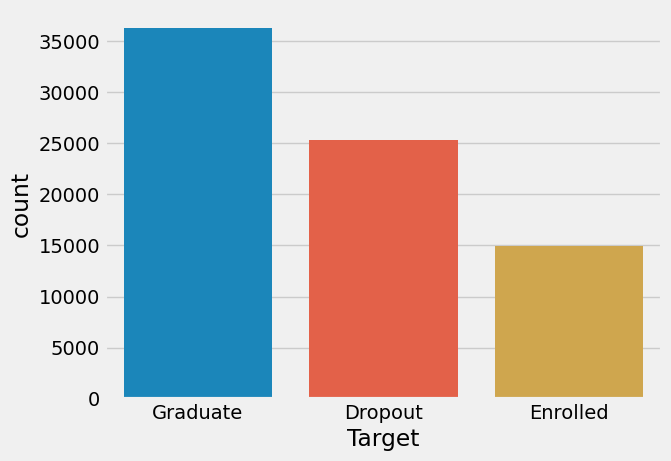

In [27]:
sn.countplot(x='Target', data=df)

### ii) Visualizing all numerical columns

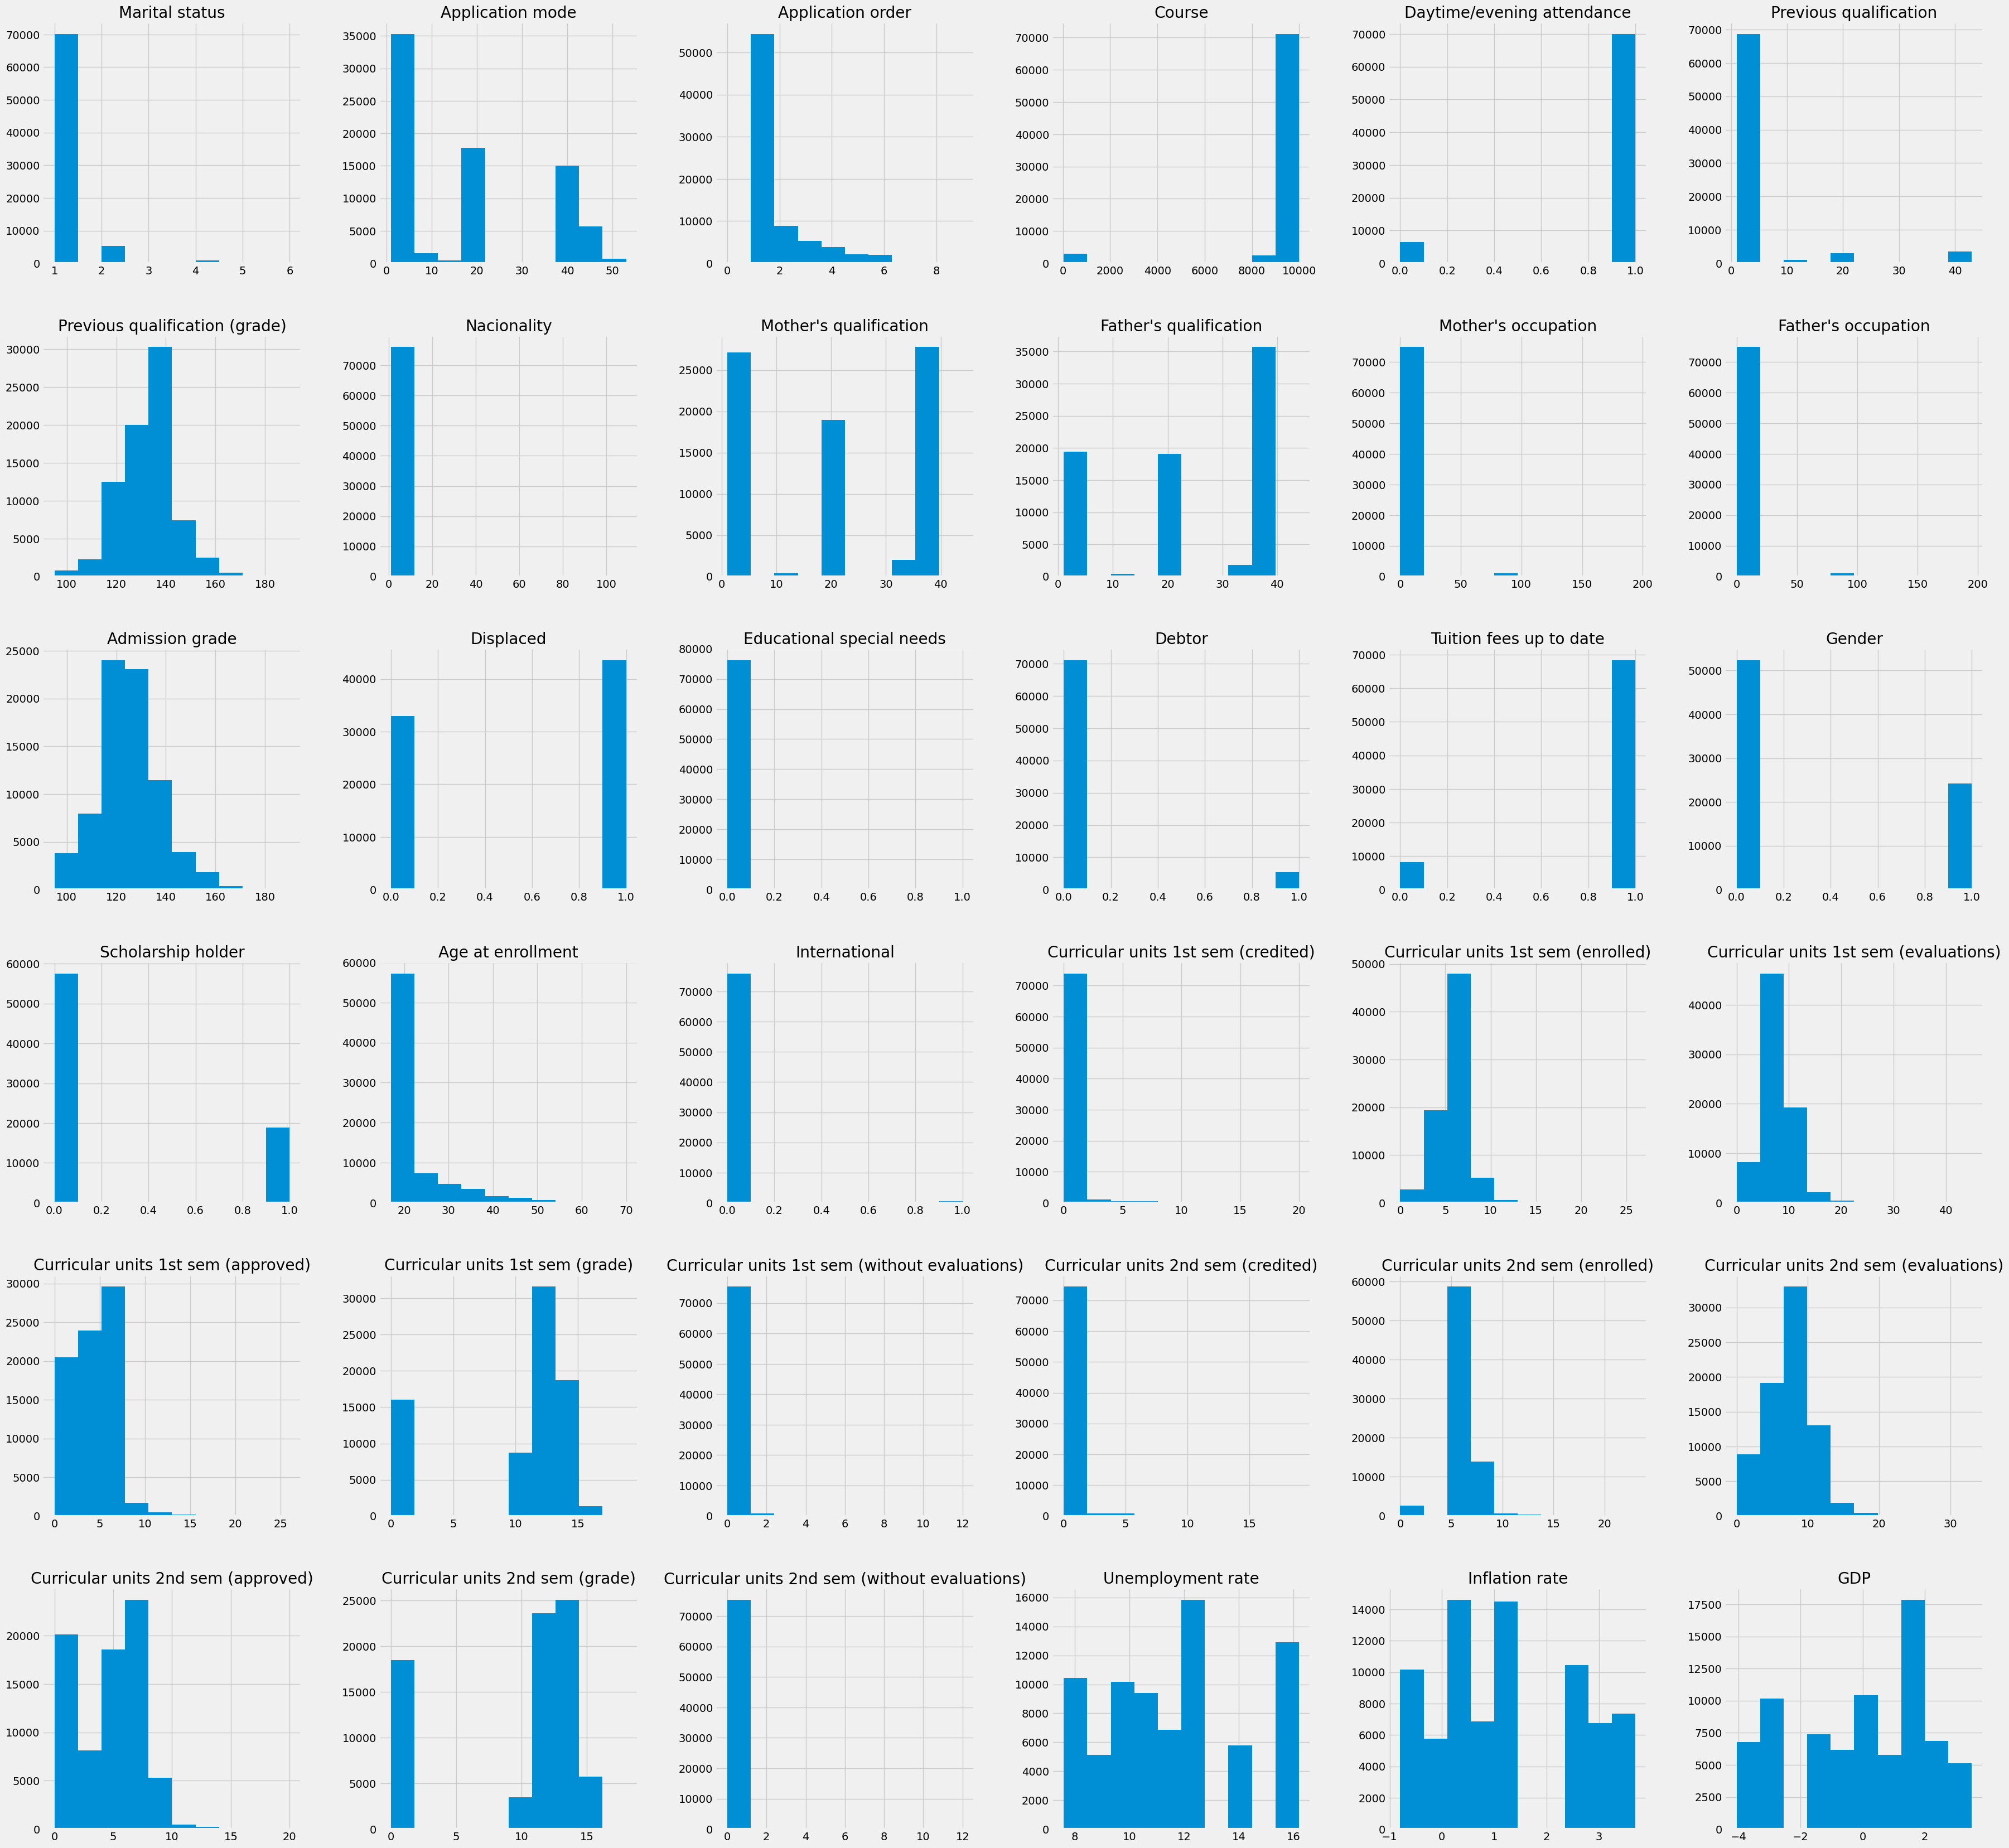

In [31]:
df.hist(figsize=(40,40));

### iii) Visualizing all continues columns

#### Finding how many continues features present in our dataset?

In [58]:
num_cols=[ col for col in df.columns if df[col].nunique()>=9]

num_cols

['Application mode',
 'Course',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [59]:
len(num_cols)

26

### Visualizing Continues columns using KDEplot

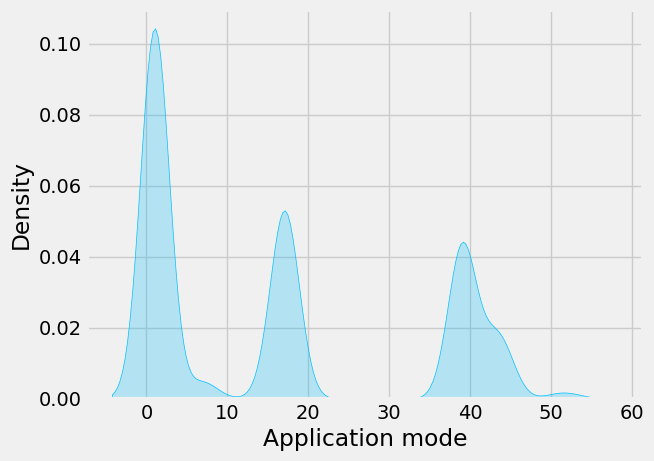

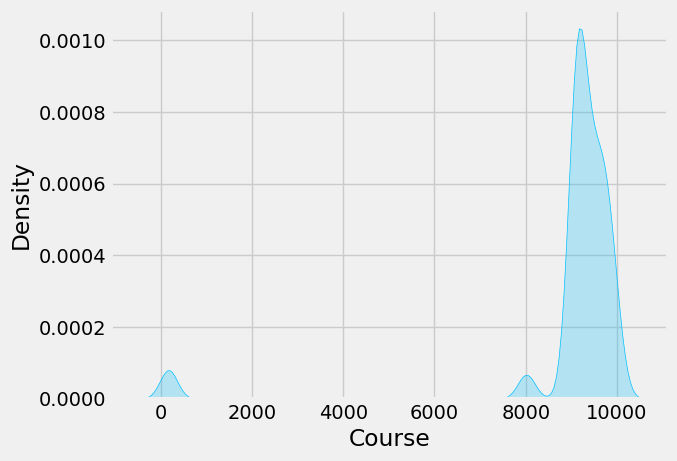

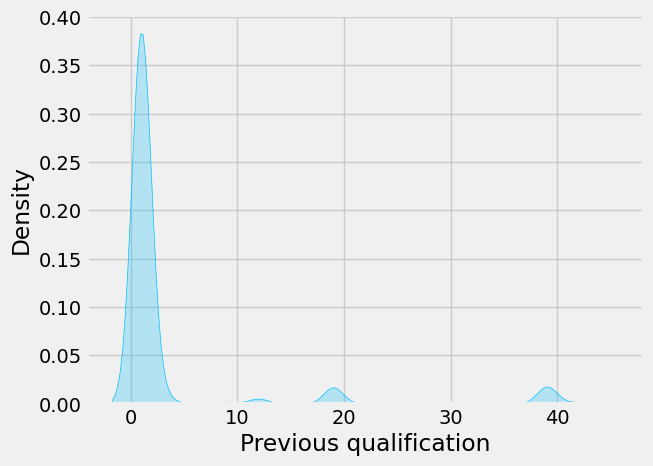

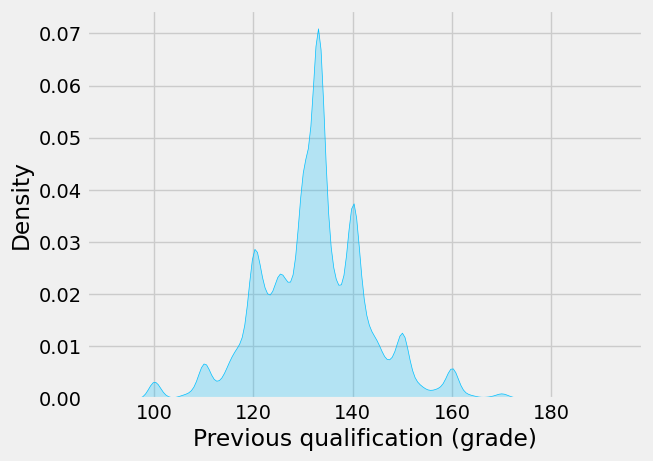

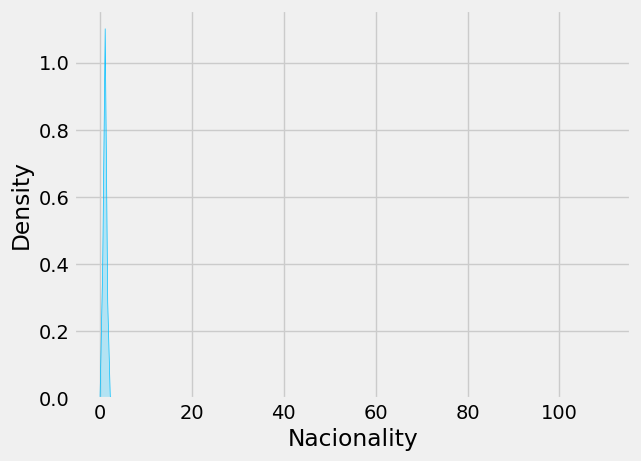

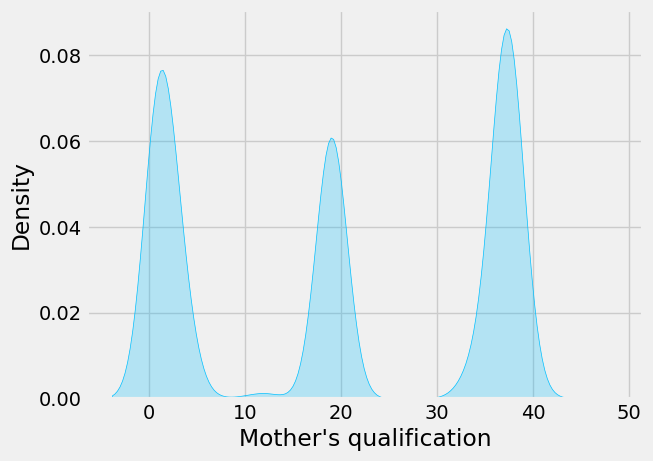

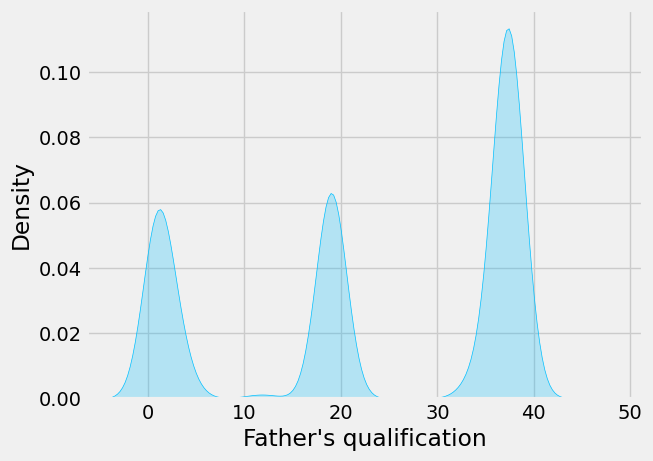

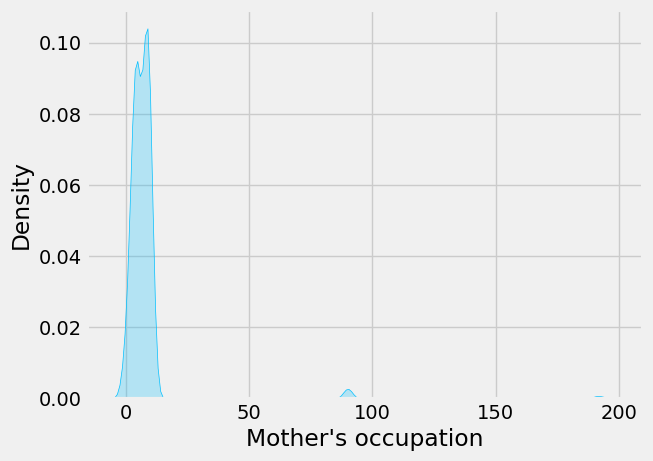

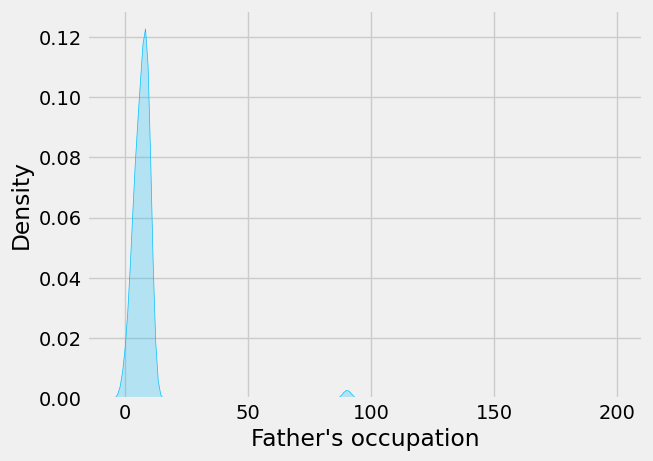

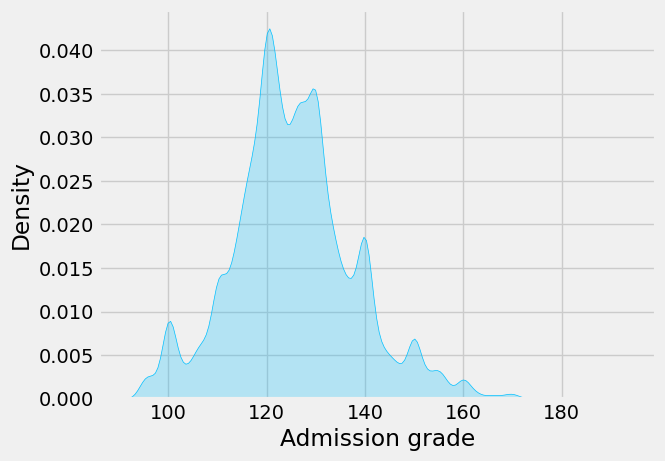

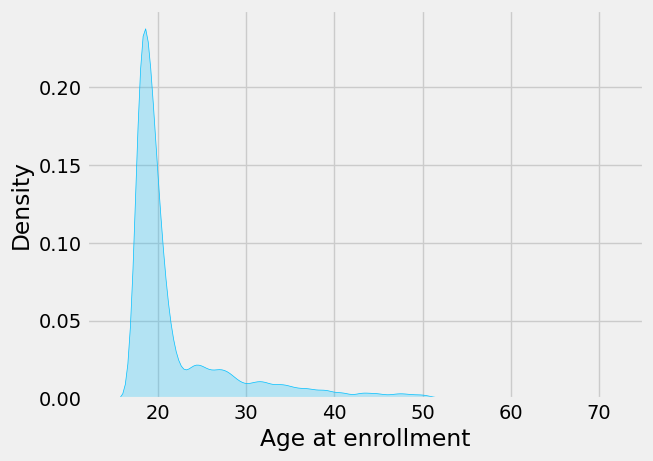

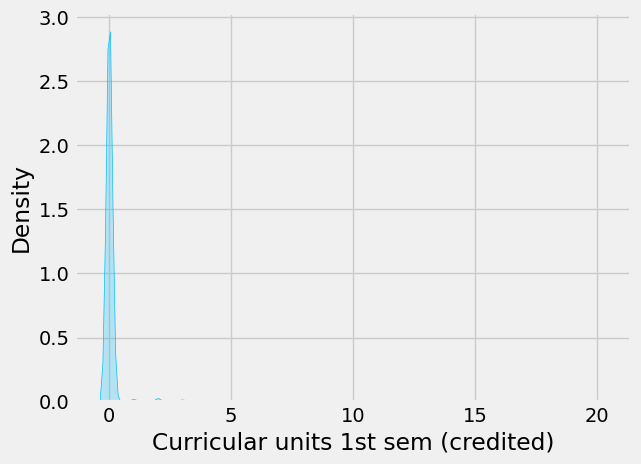

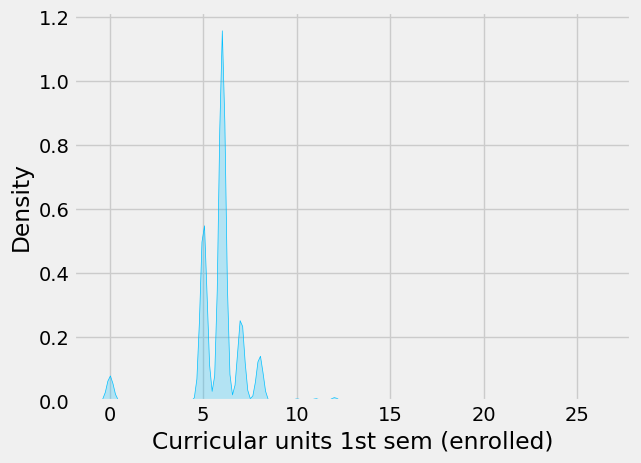

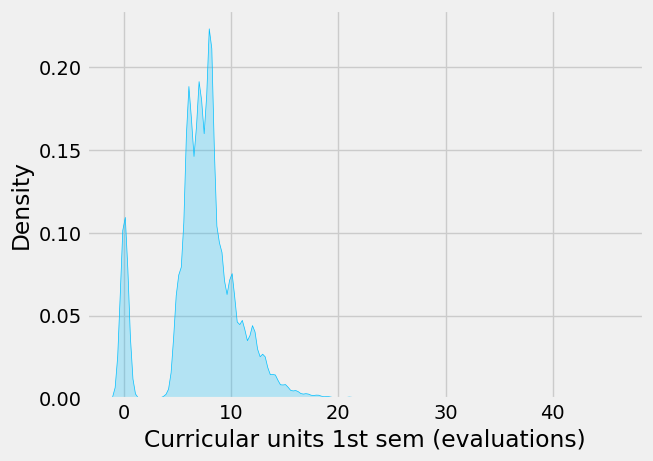

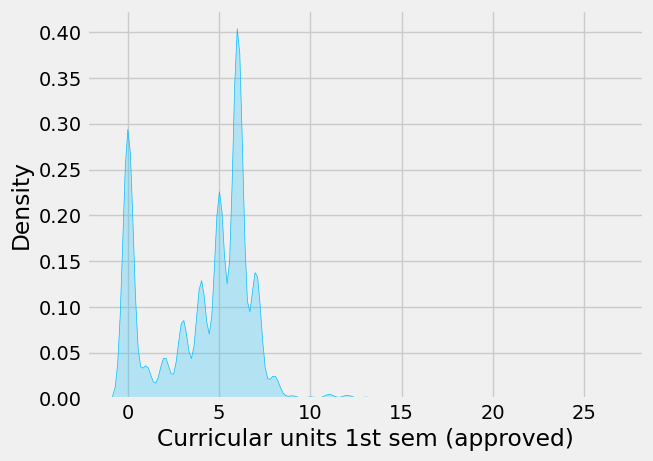

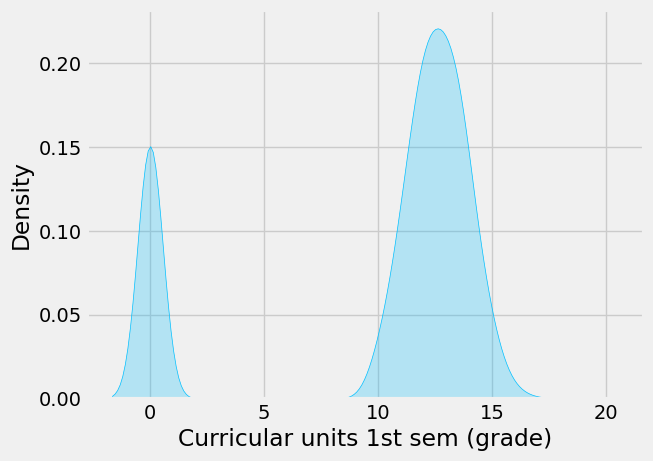

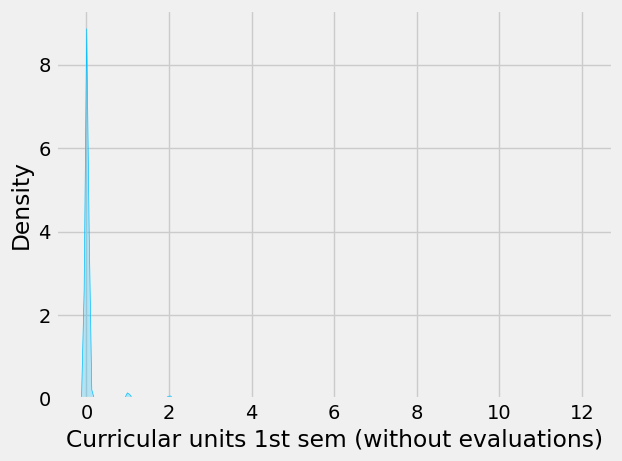

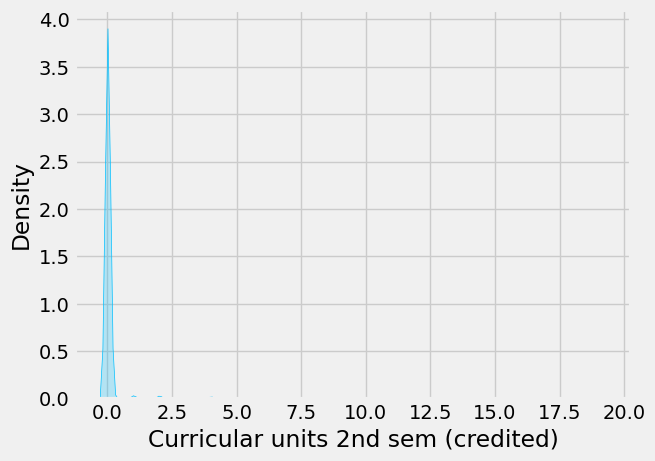

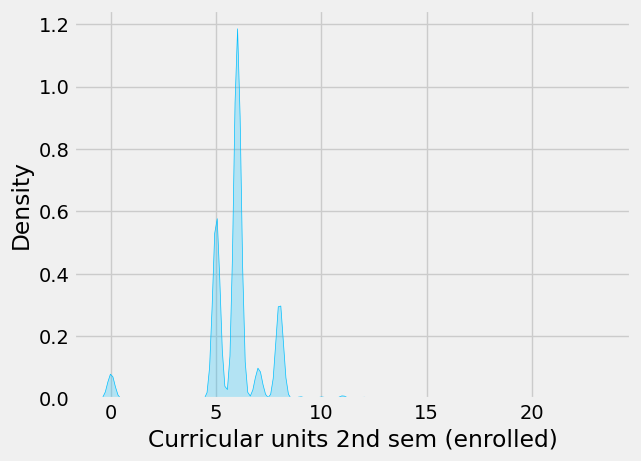

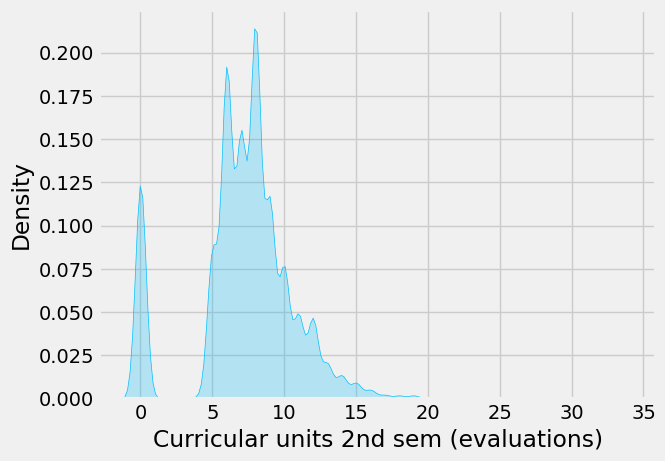

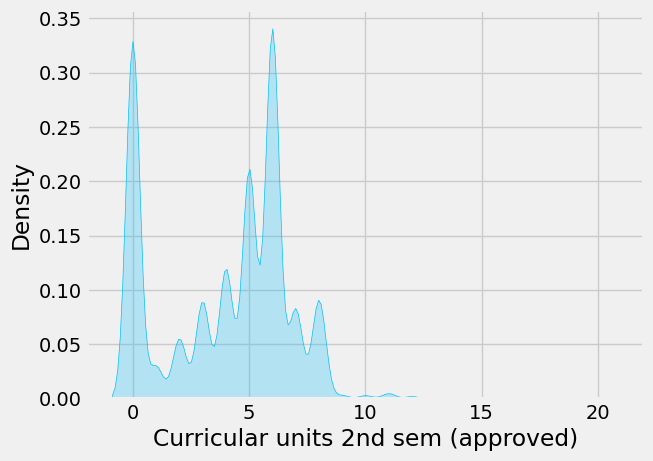

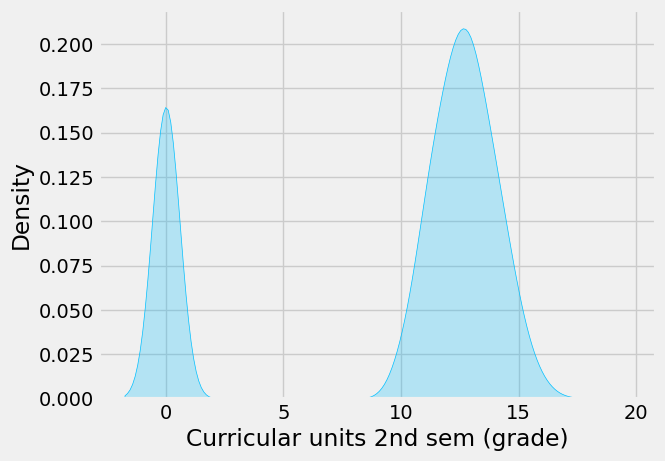

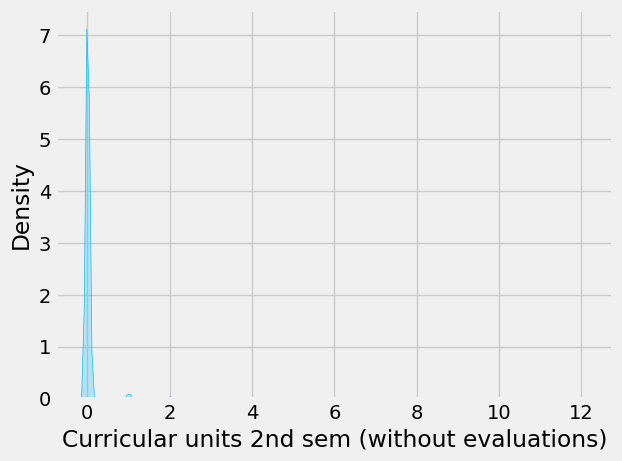

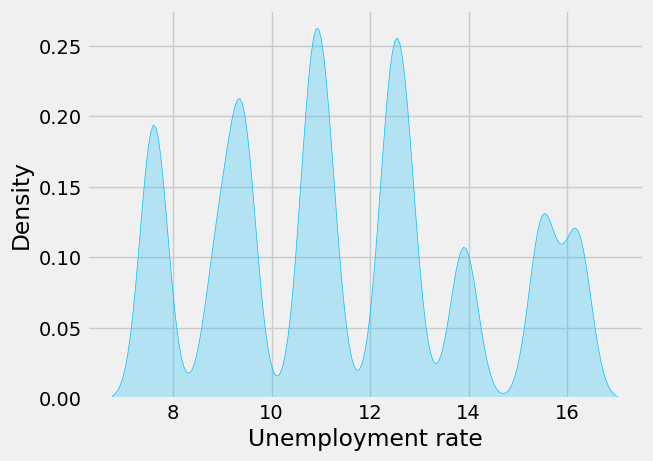

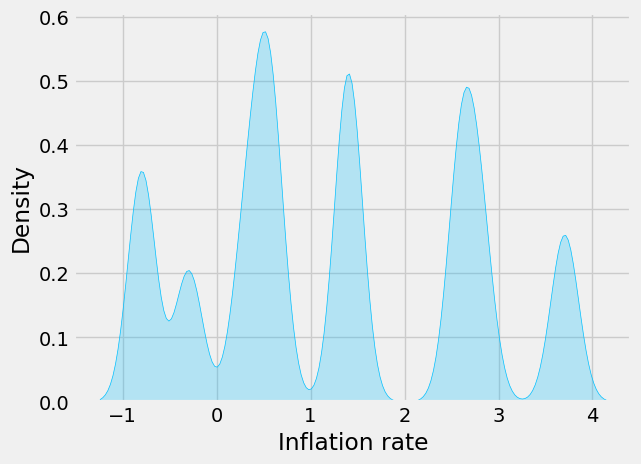

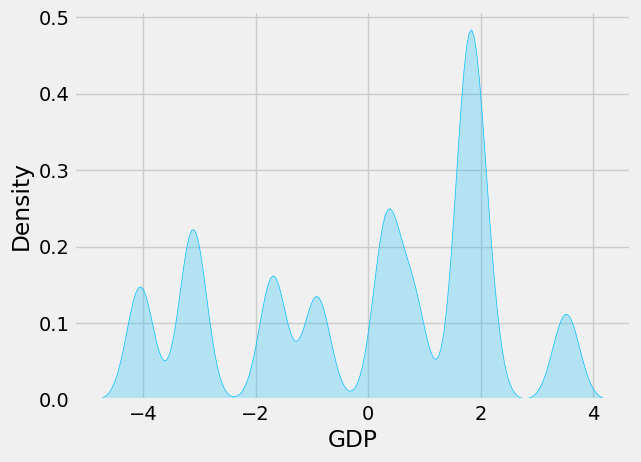

In [63]:
for col in num_cols:
    sn.kdeplot(x=col, data=df, color='deepskyblue', fill=True)
    plt.show()

### iii) Visualizing all categorical columns

#### Finding how many categorical features present in our dataset?

In [35]:
cat_cols=[ col for col in df.columns if df[col].nunique()<=8 ]

cat_cols

['Marital status',
 'Application order',
 'Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Target']

In [36]:
len(cat_cols)

11

### Visualizing the categorical columns using countplot and pie-chart

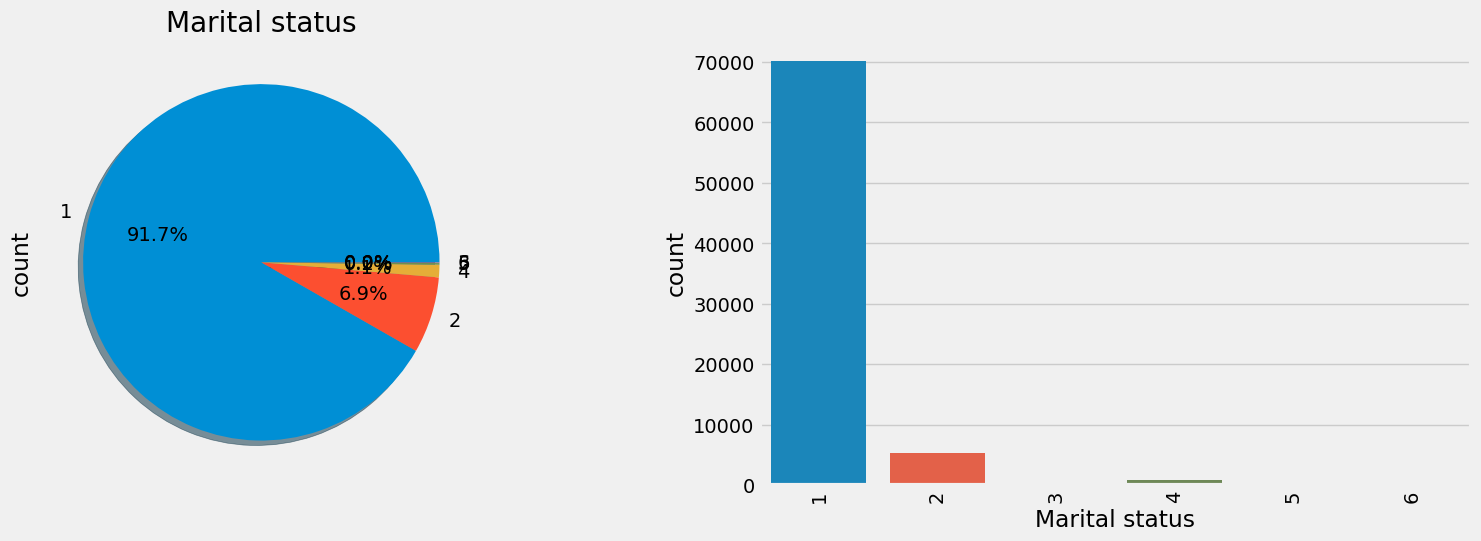

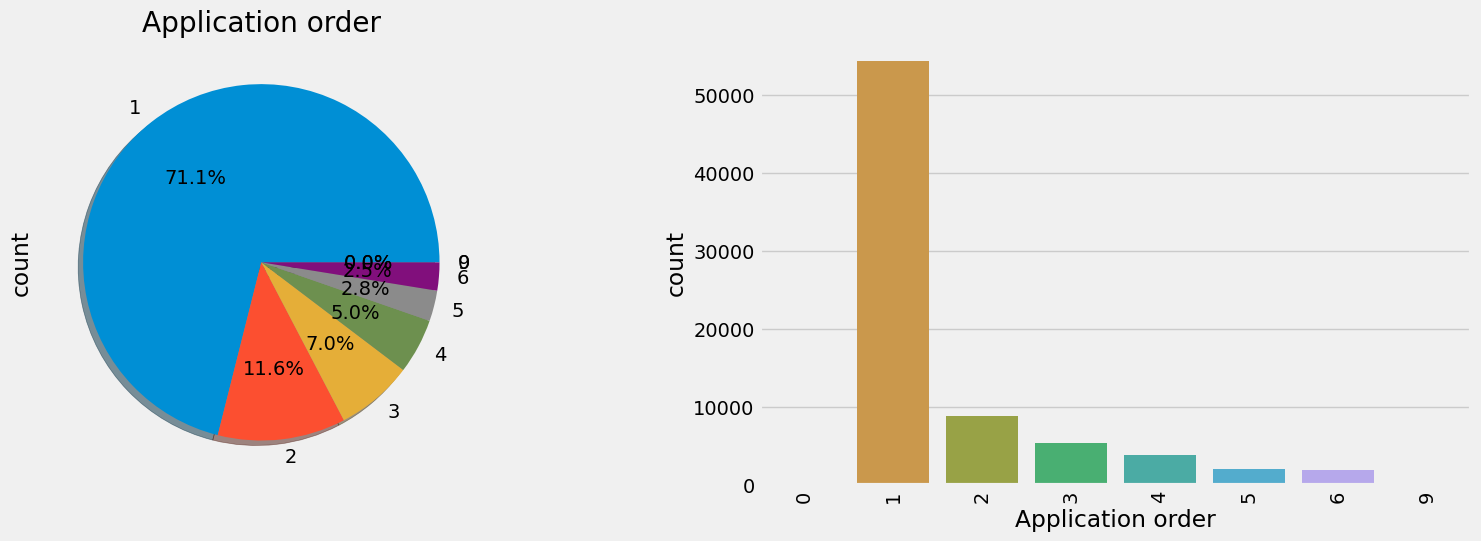

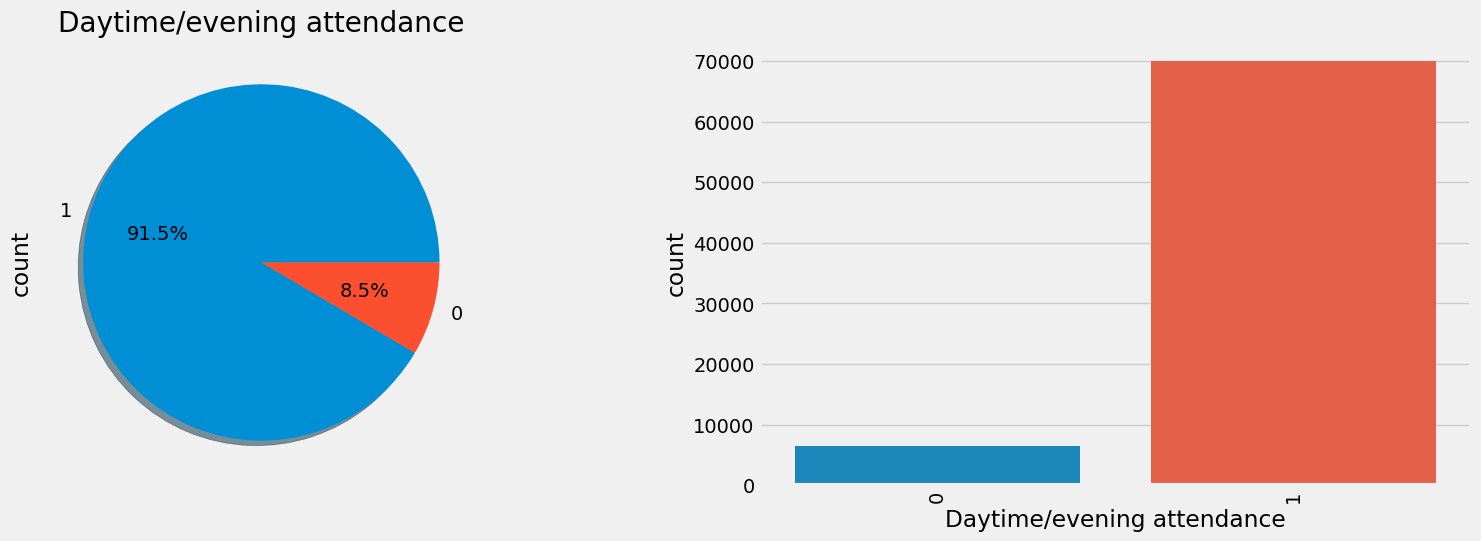

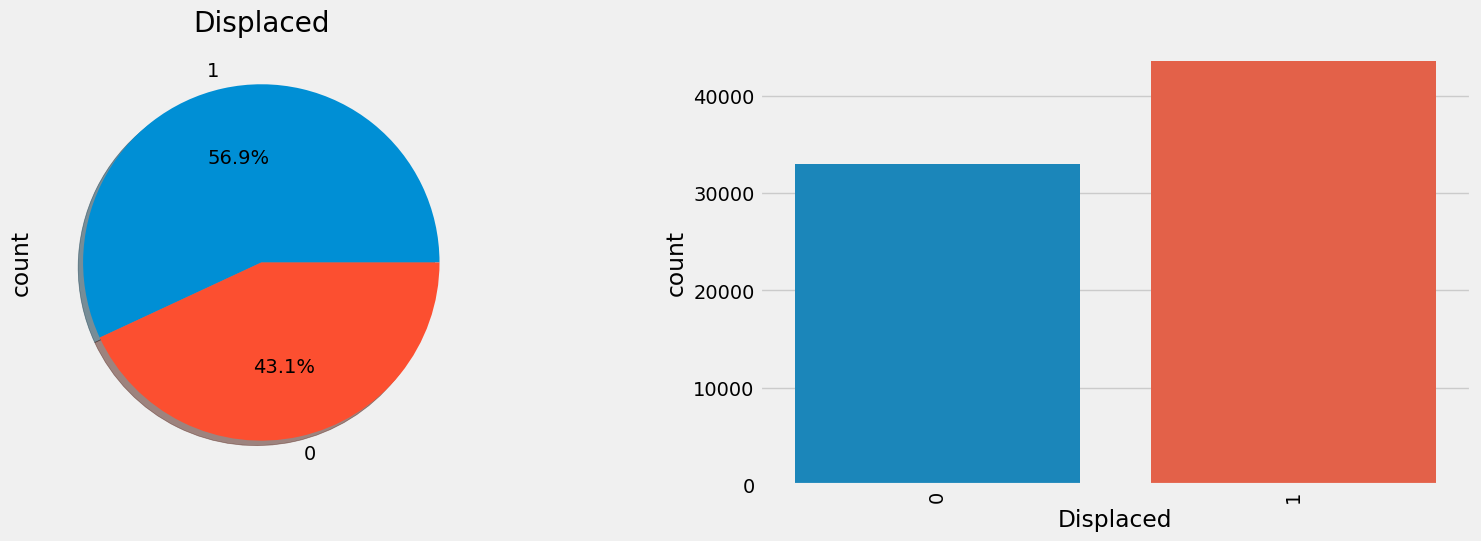

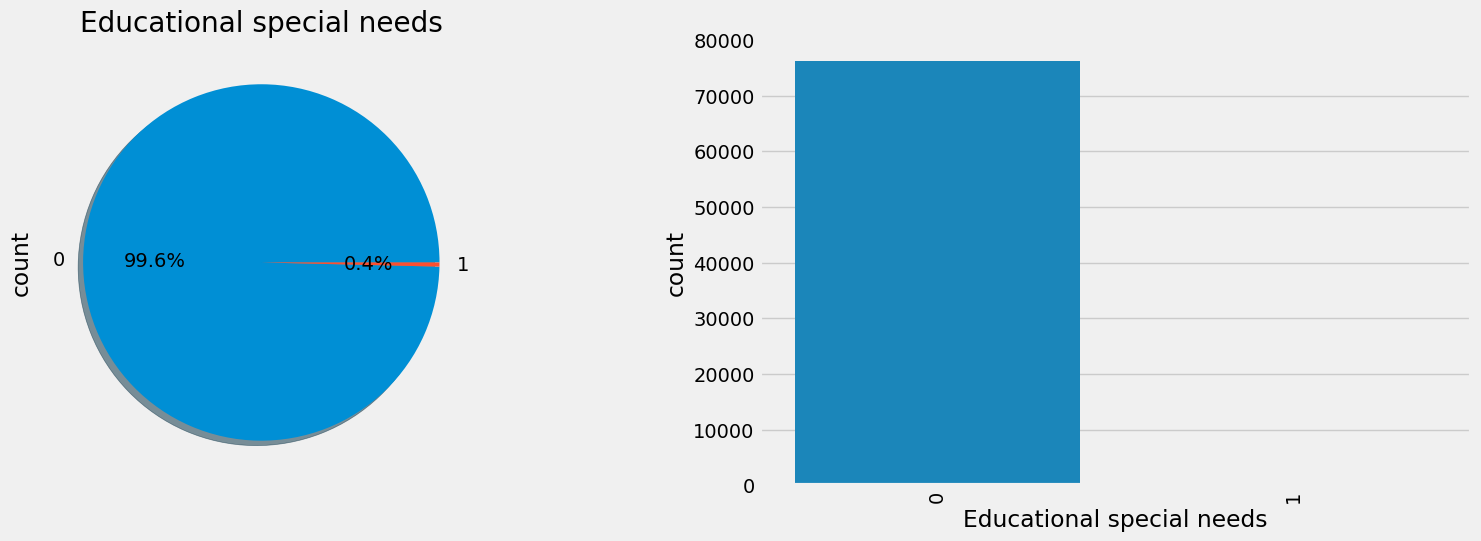

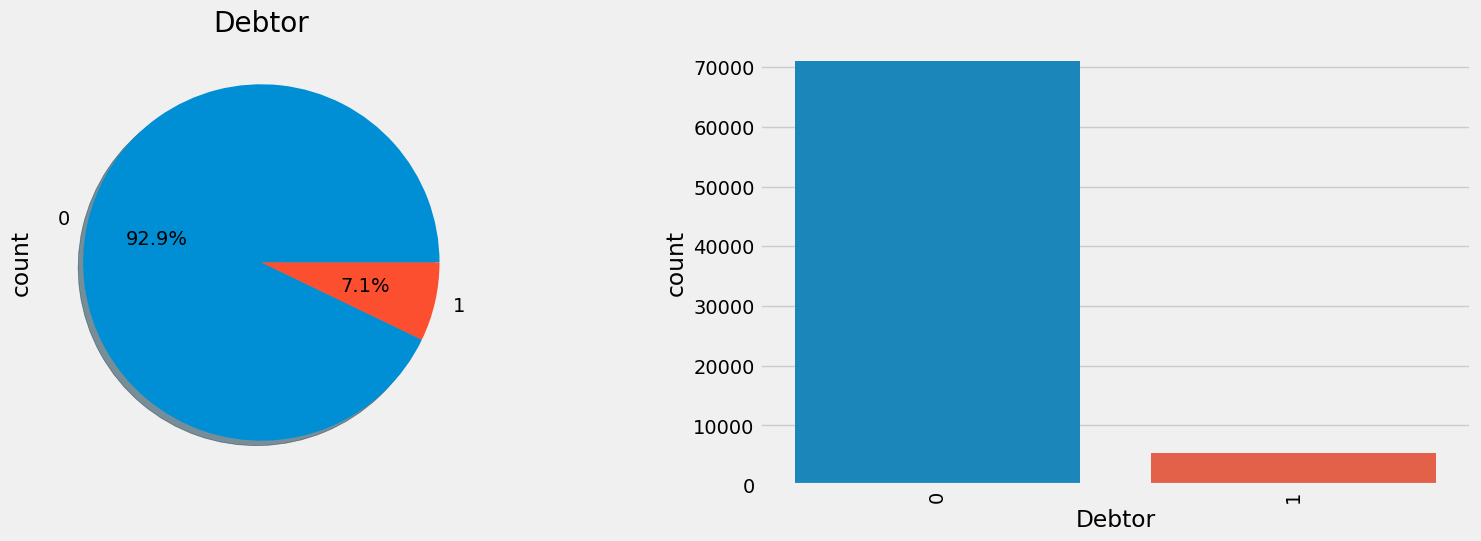

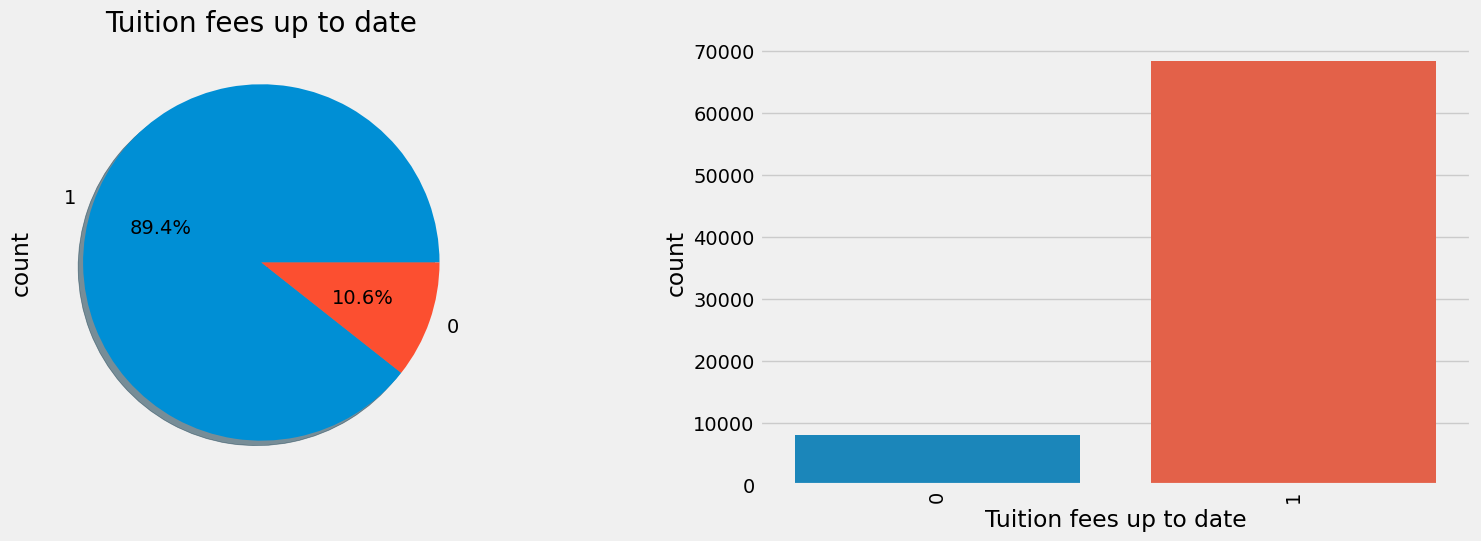

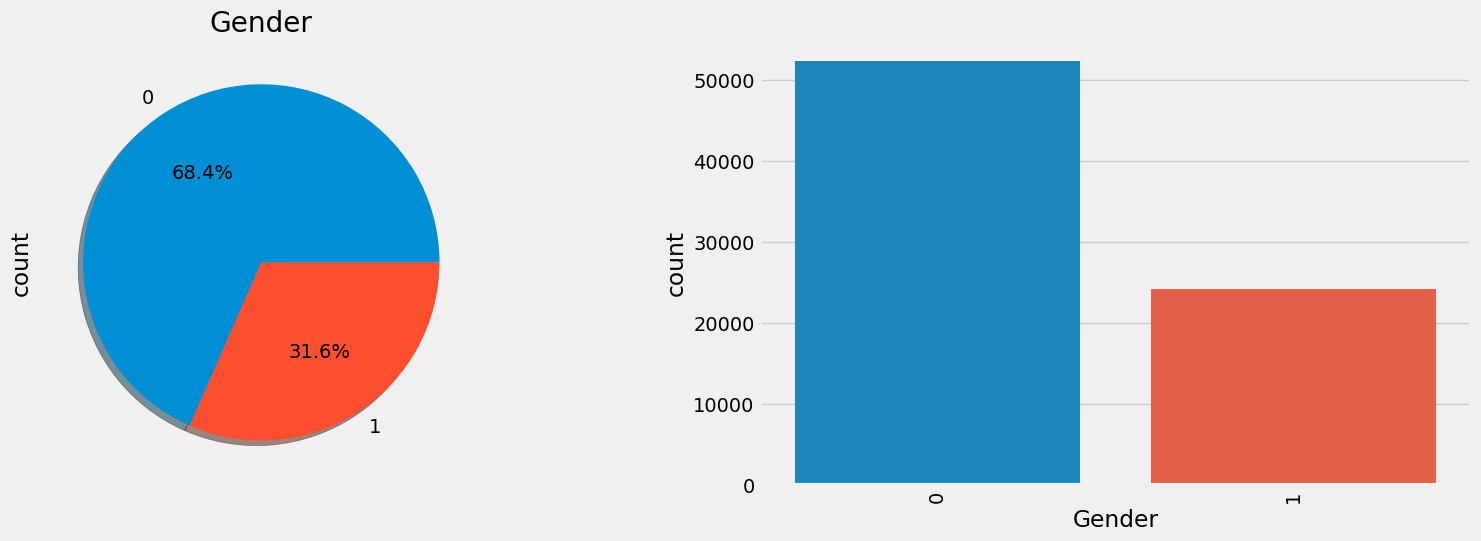

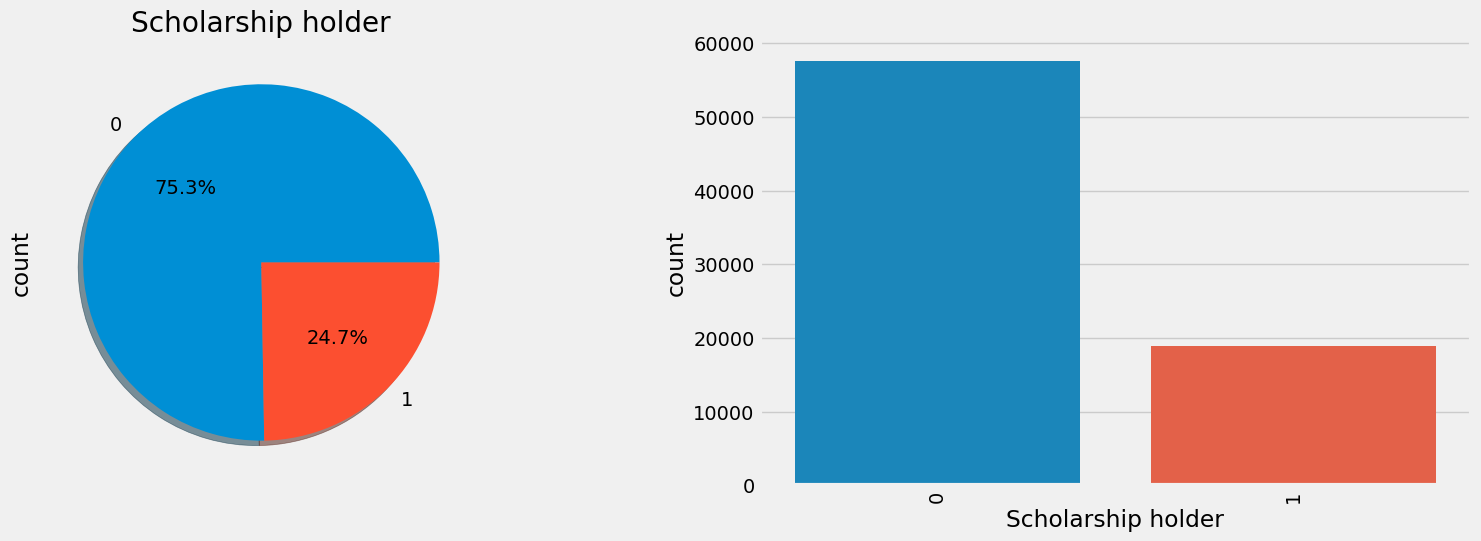

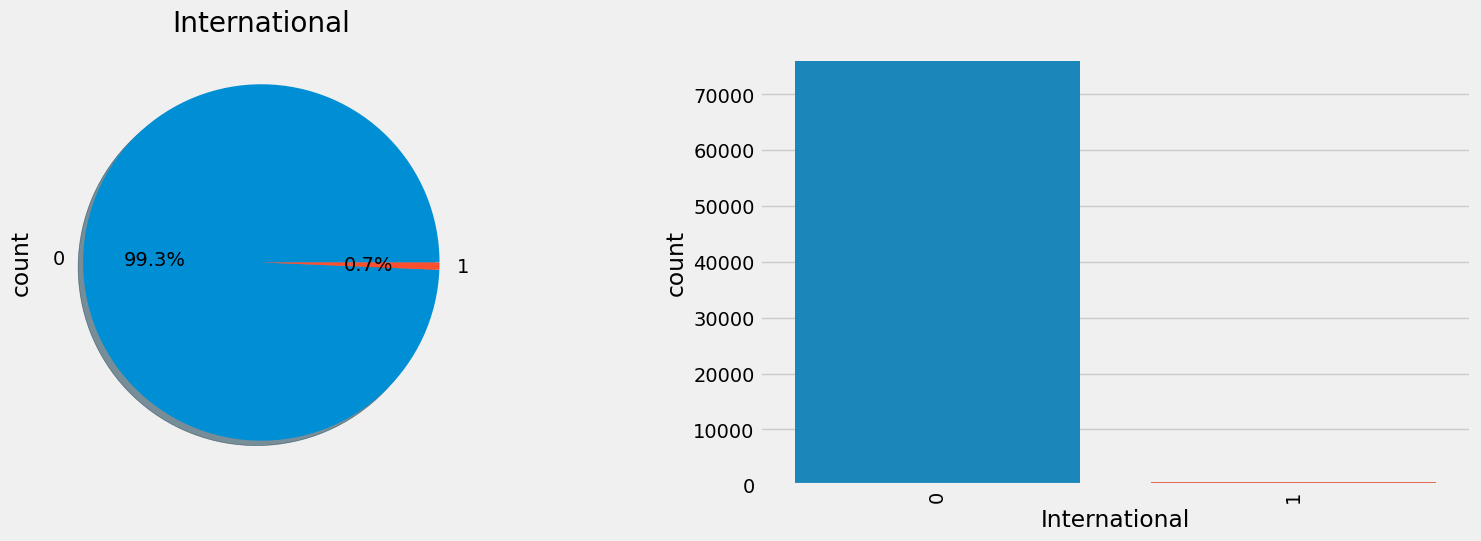

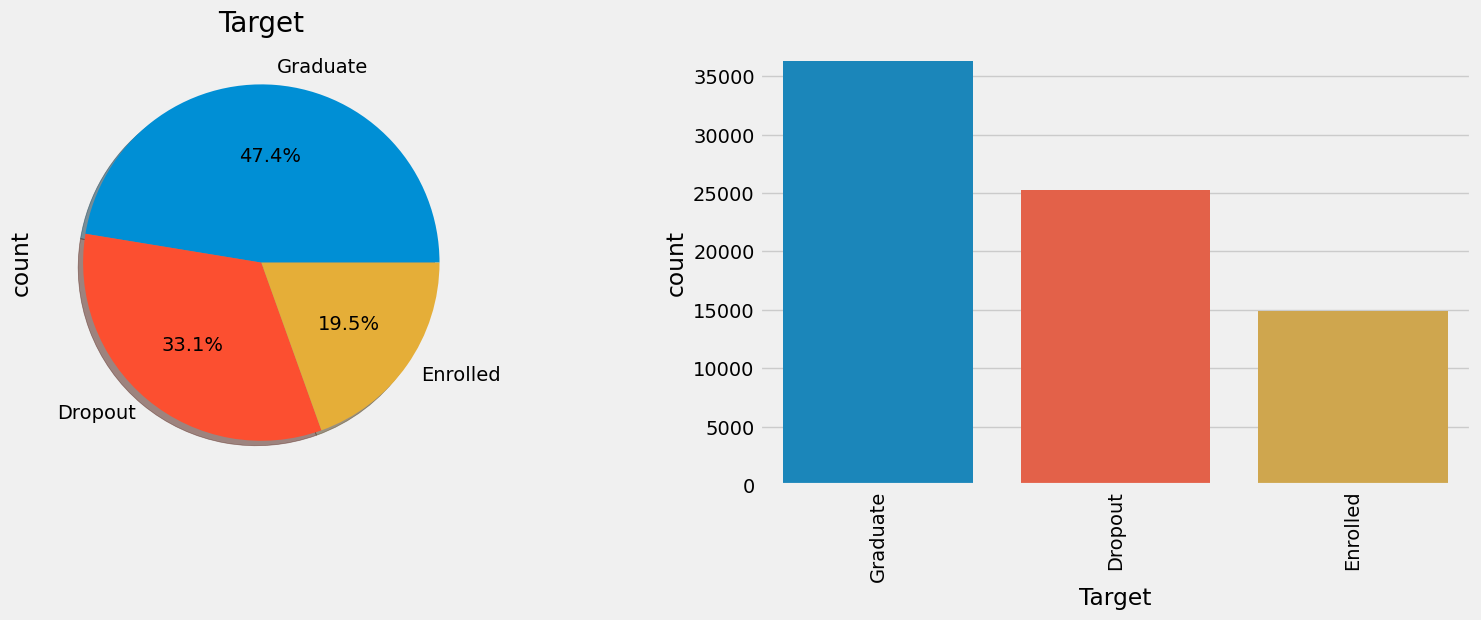

In [41]:
for col in cat_cols:
    f, ax=plt.subplots(1,2, figsize=(18, 5.5))
    
    # Pie chart
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f'{col}')
    
    # Count plot
    sn.countplot(x=col, data=df, ax=ax[1])
    plt.xticks(rotation=90)
    
    plt.show()

### Encoding the target column

In [75]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

In [76]:
df['Target']=lb.fit_transform(df['Target'])

In [77]:
df['Target'].value_counts()

Target
2    36282
0    25296
1    14940
Name: count, dtype: int64

### iv) Visualizing the outliers

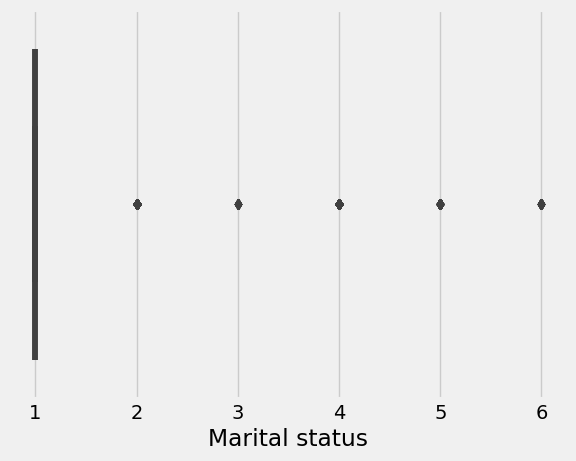

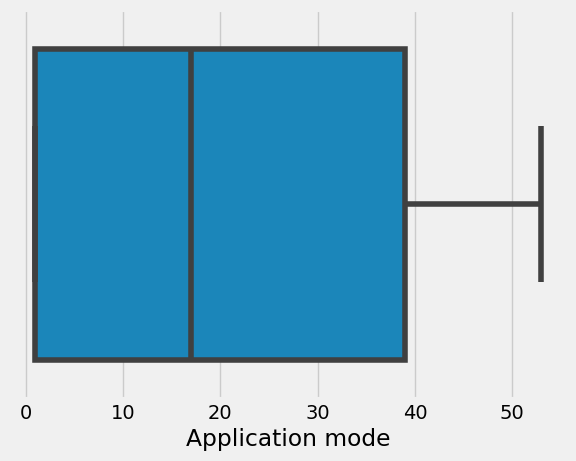

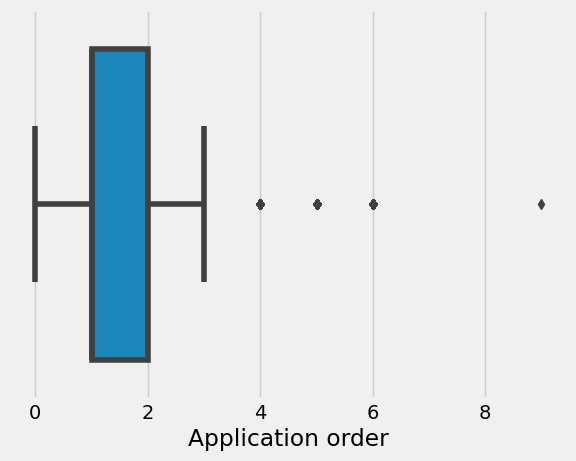

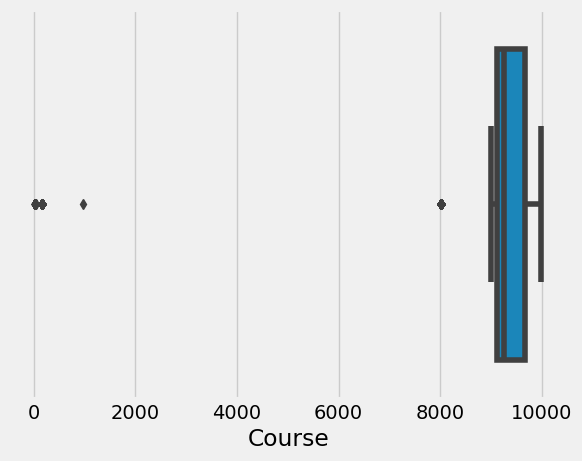

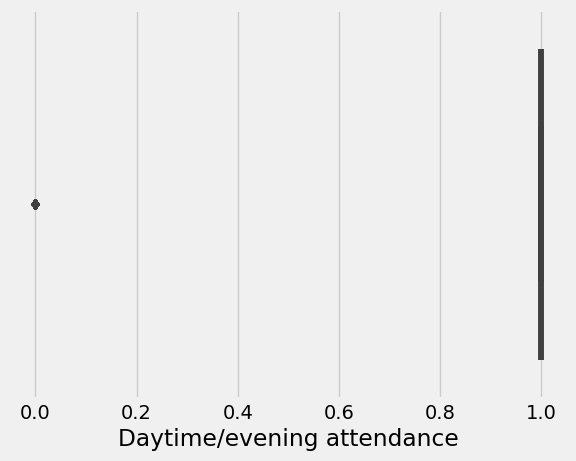

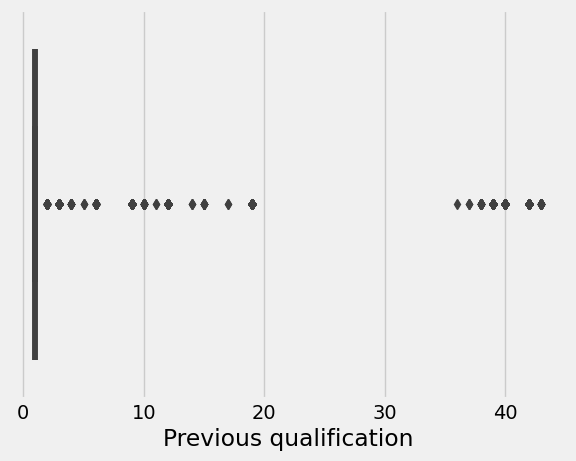

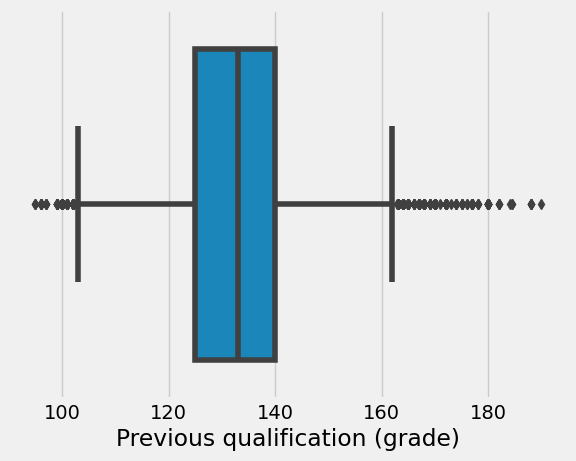

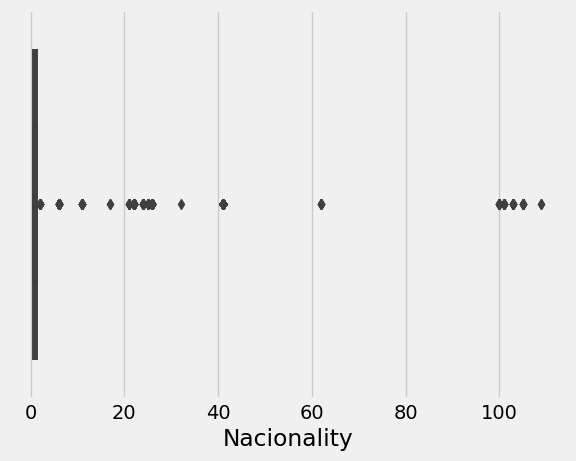

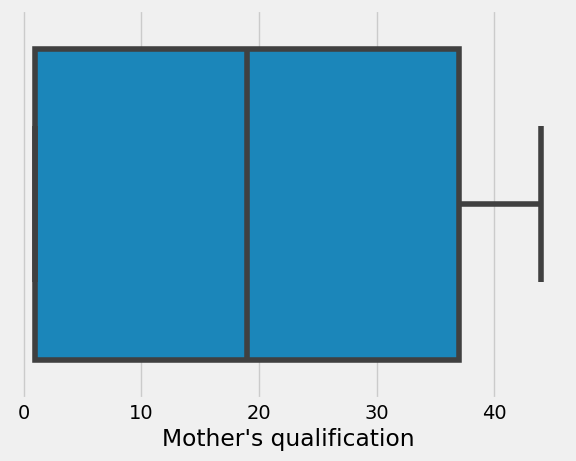

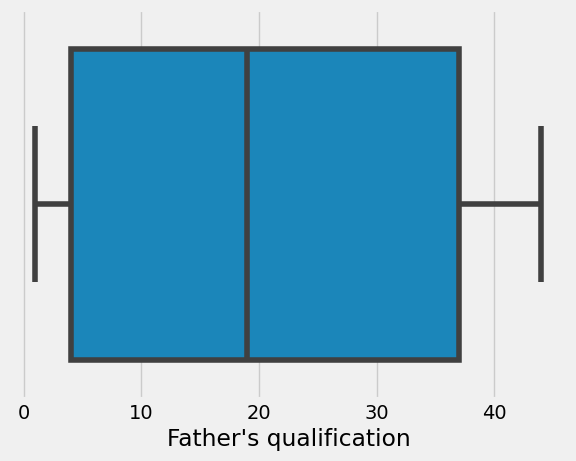

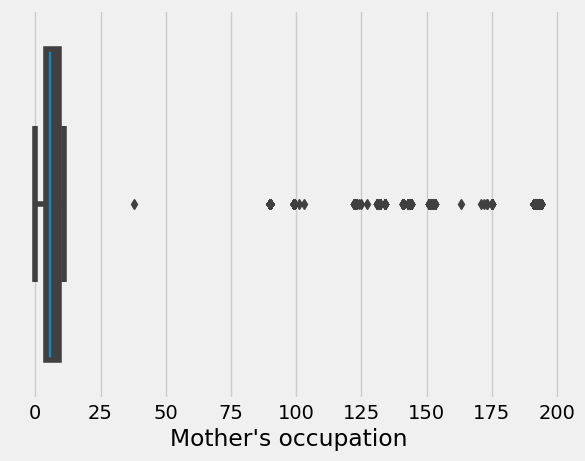

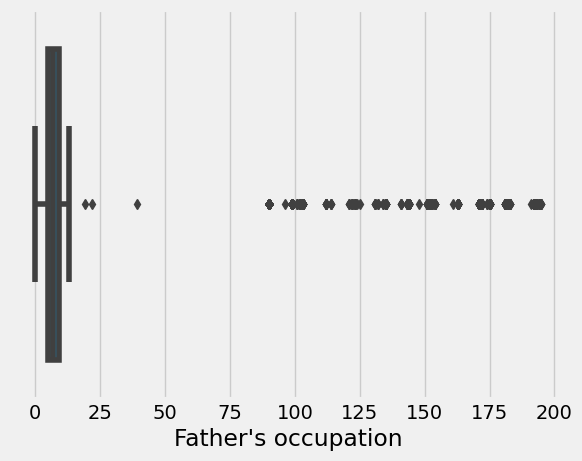

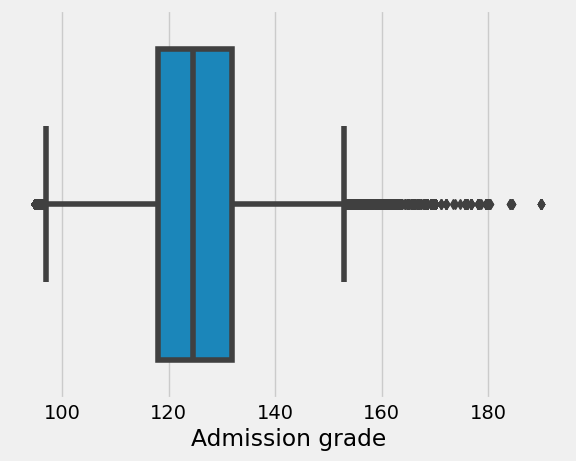

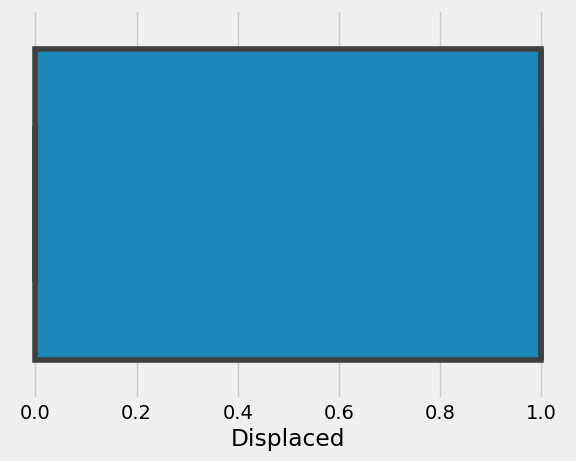

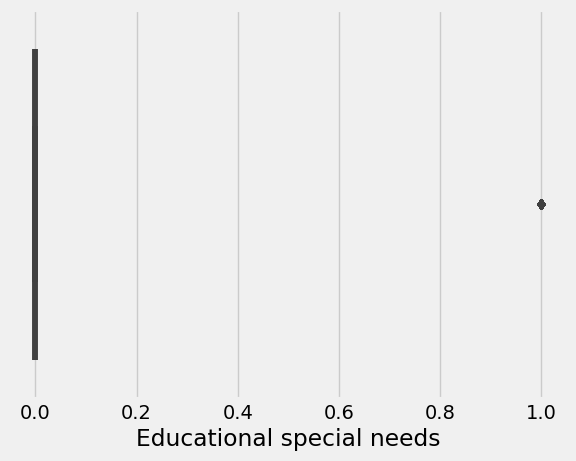

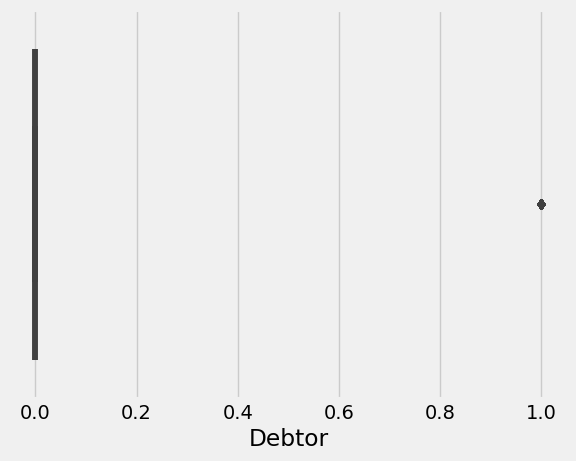

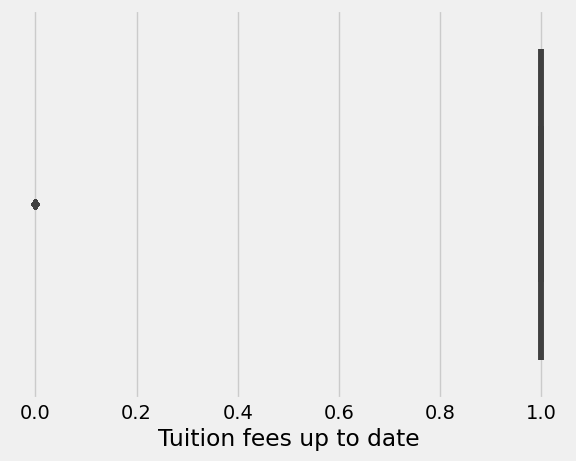

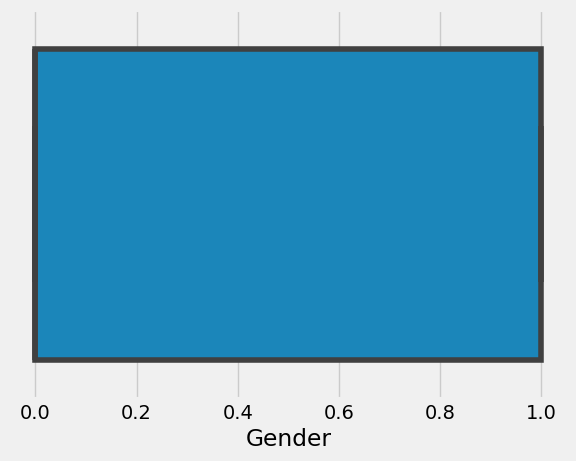

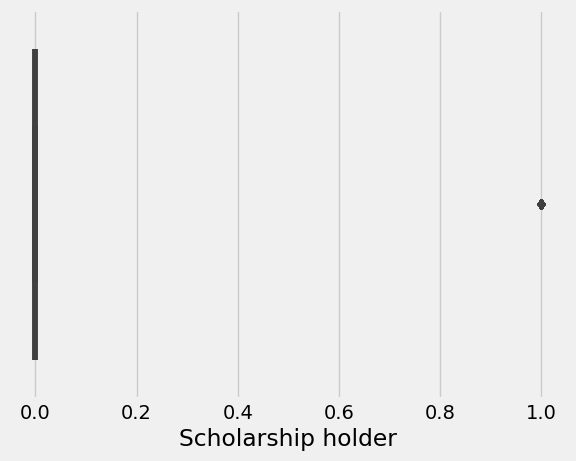

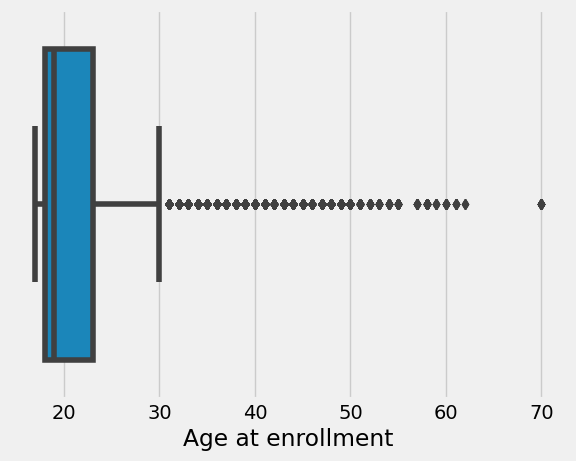

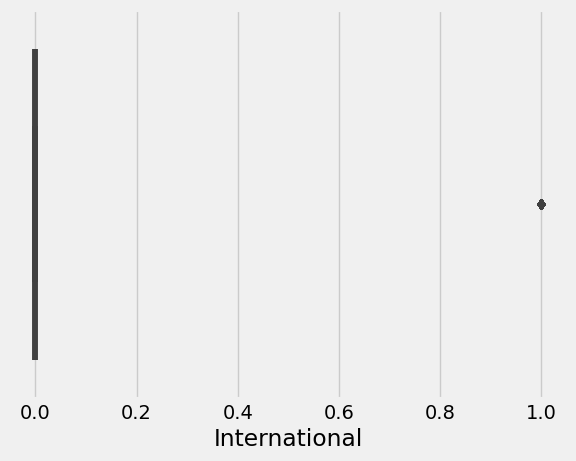

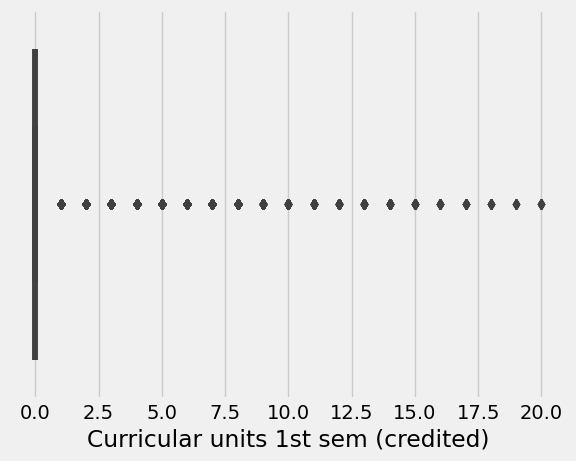

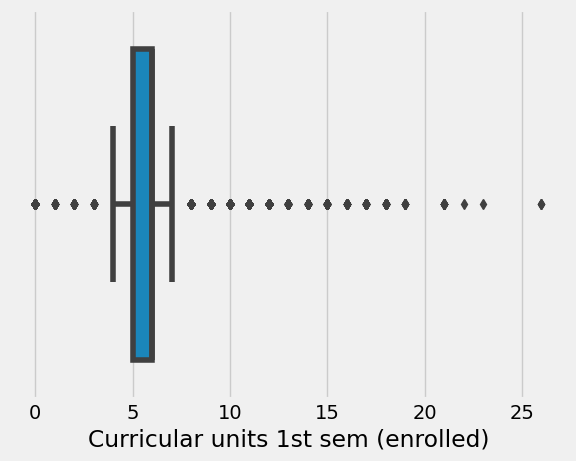

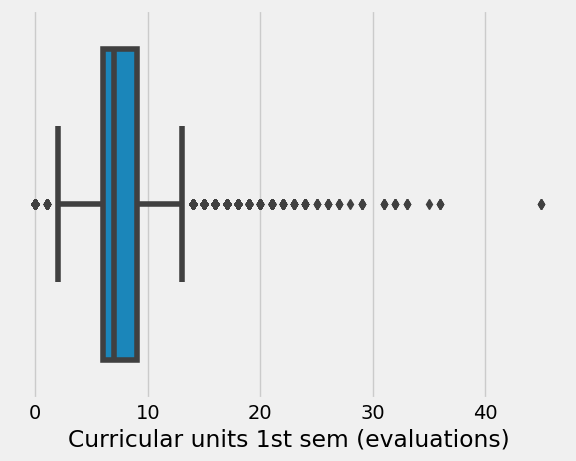

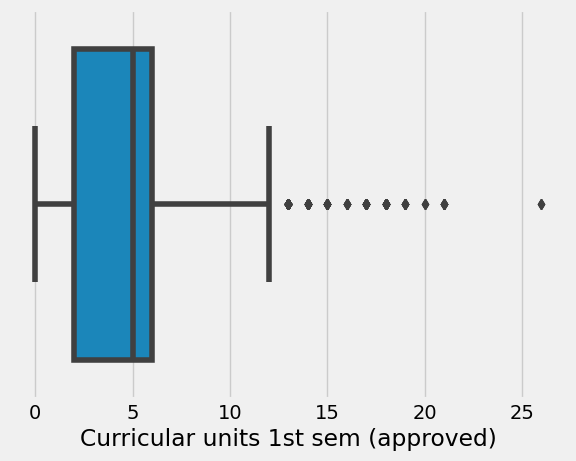

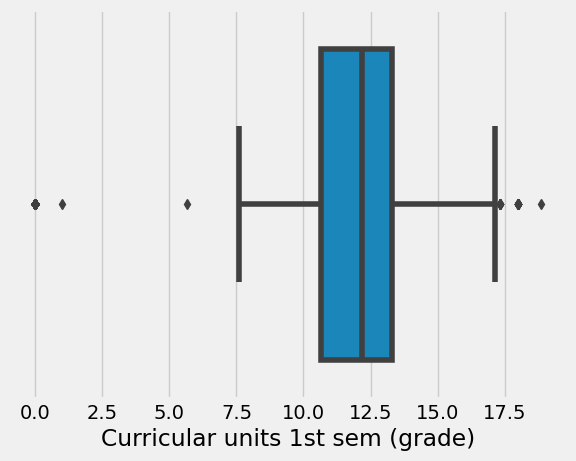

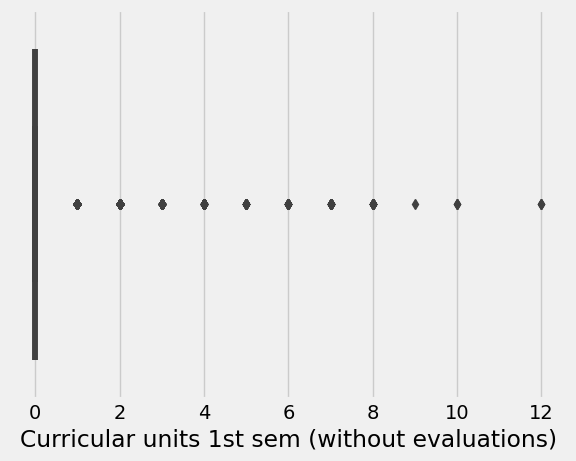

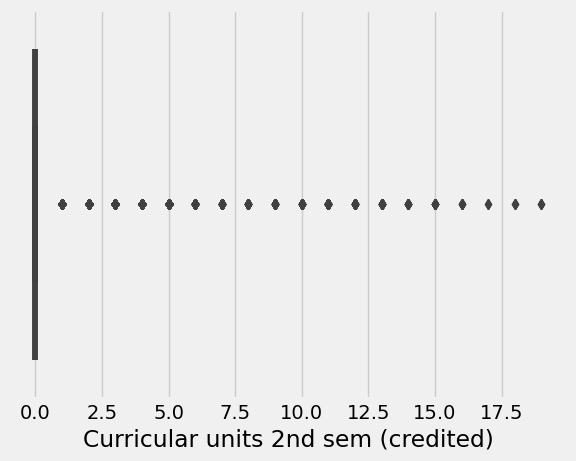

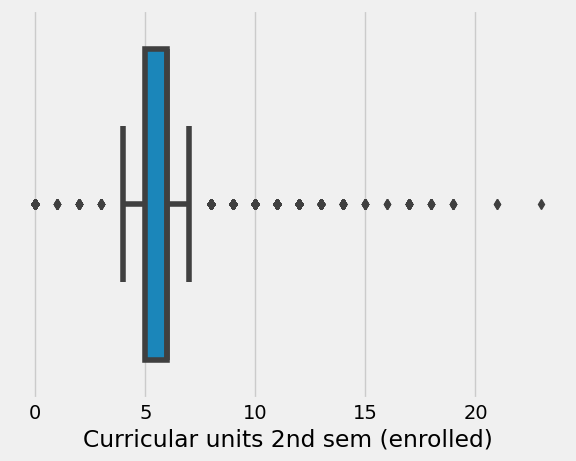

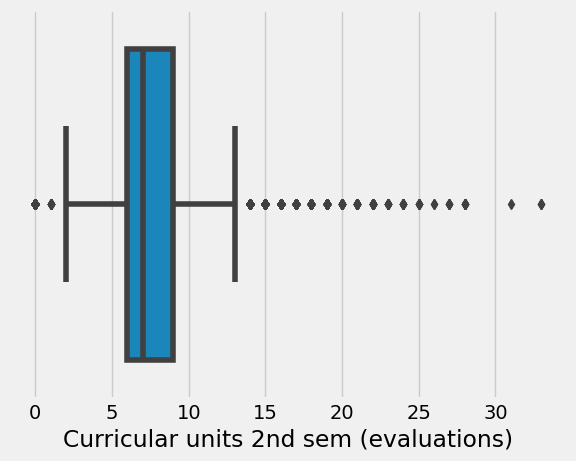

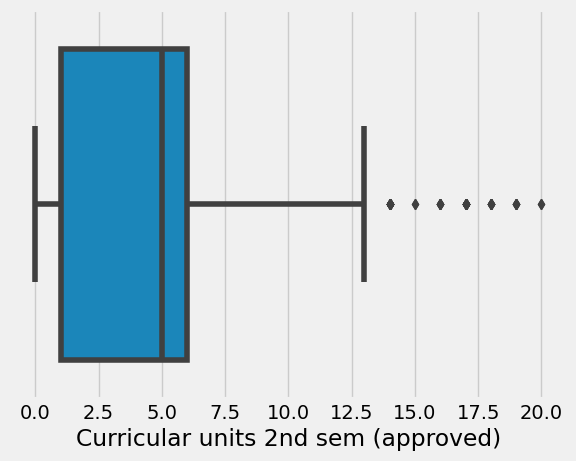

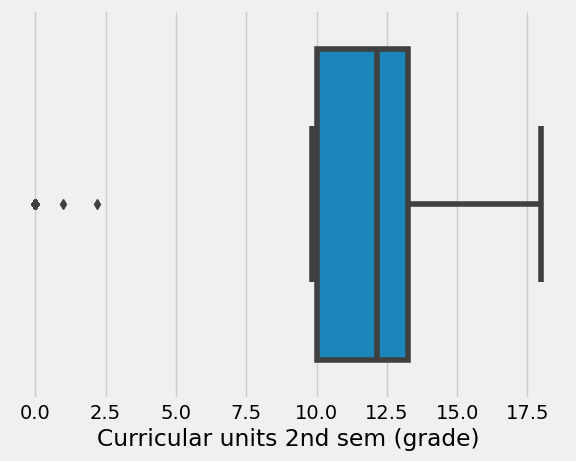

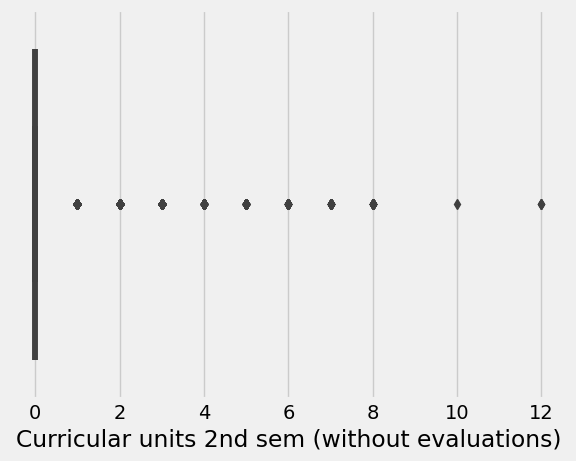

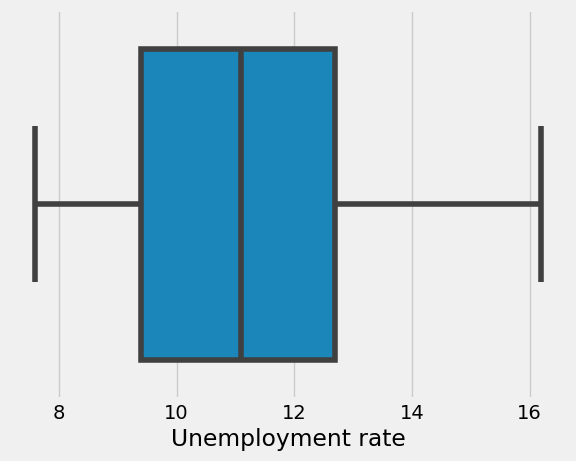

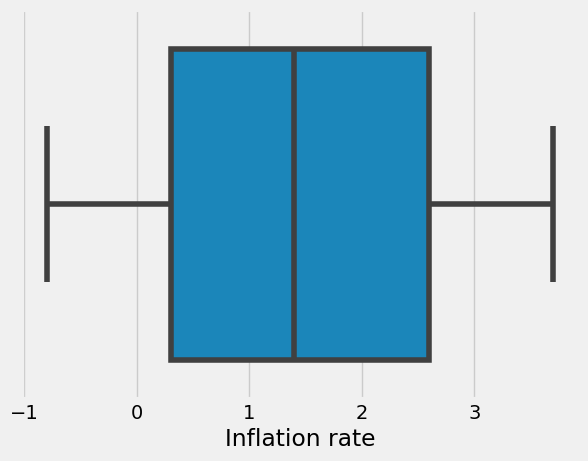

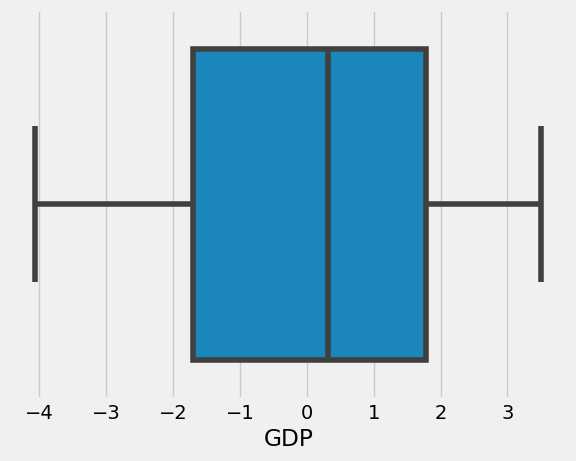

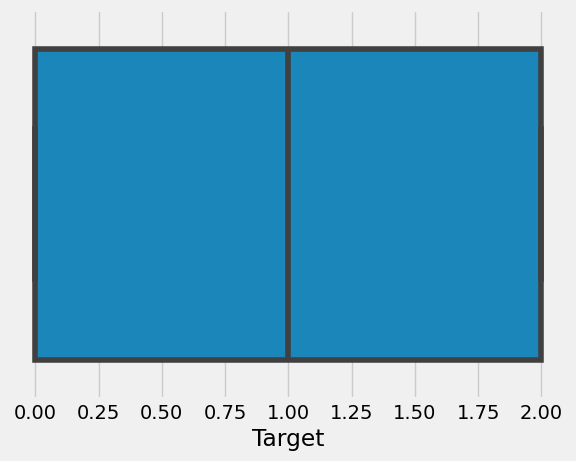

In [78]:
for col in df.columns:
    sn.boxplot(x=col, data=df)
    plt.show()

### v) Visualizing the correlation 

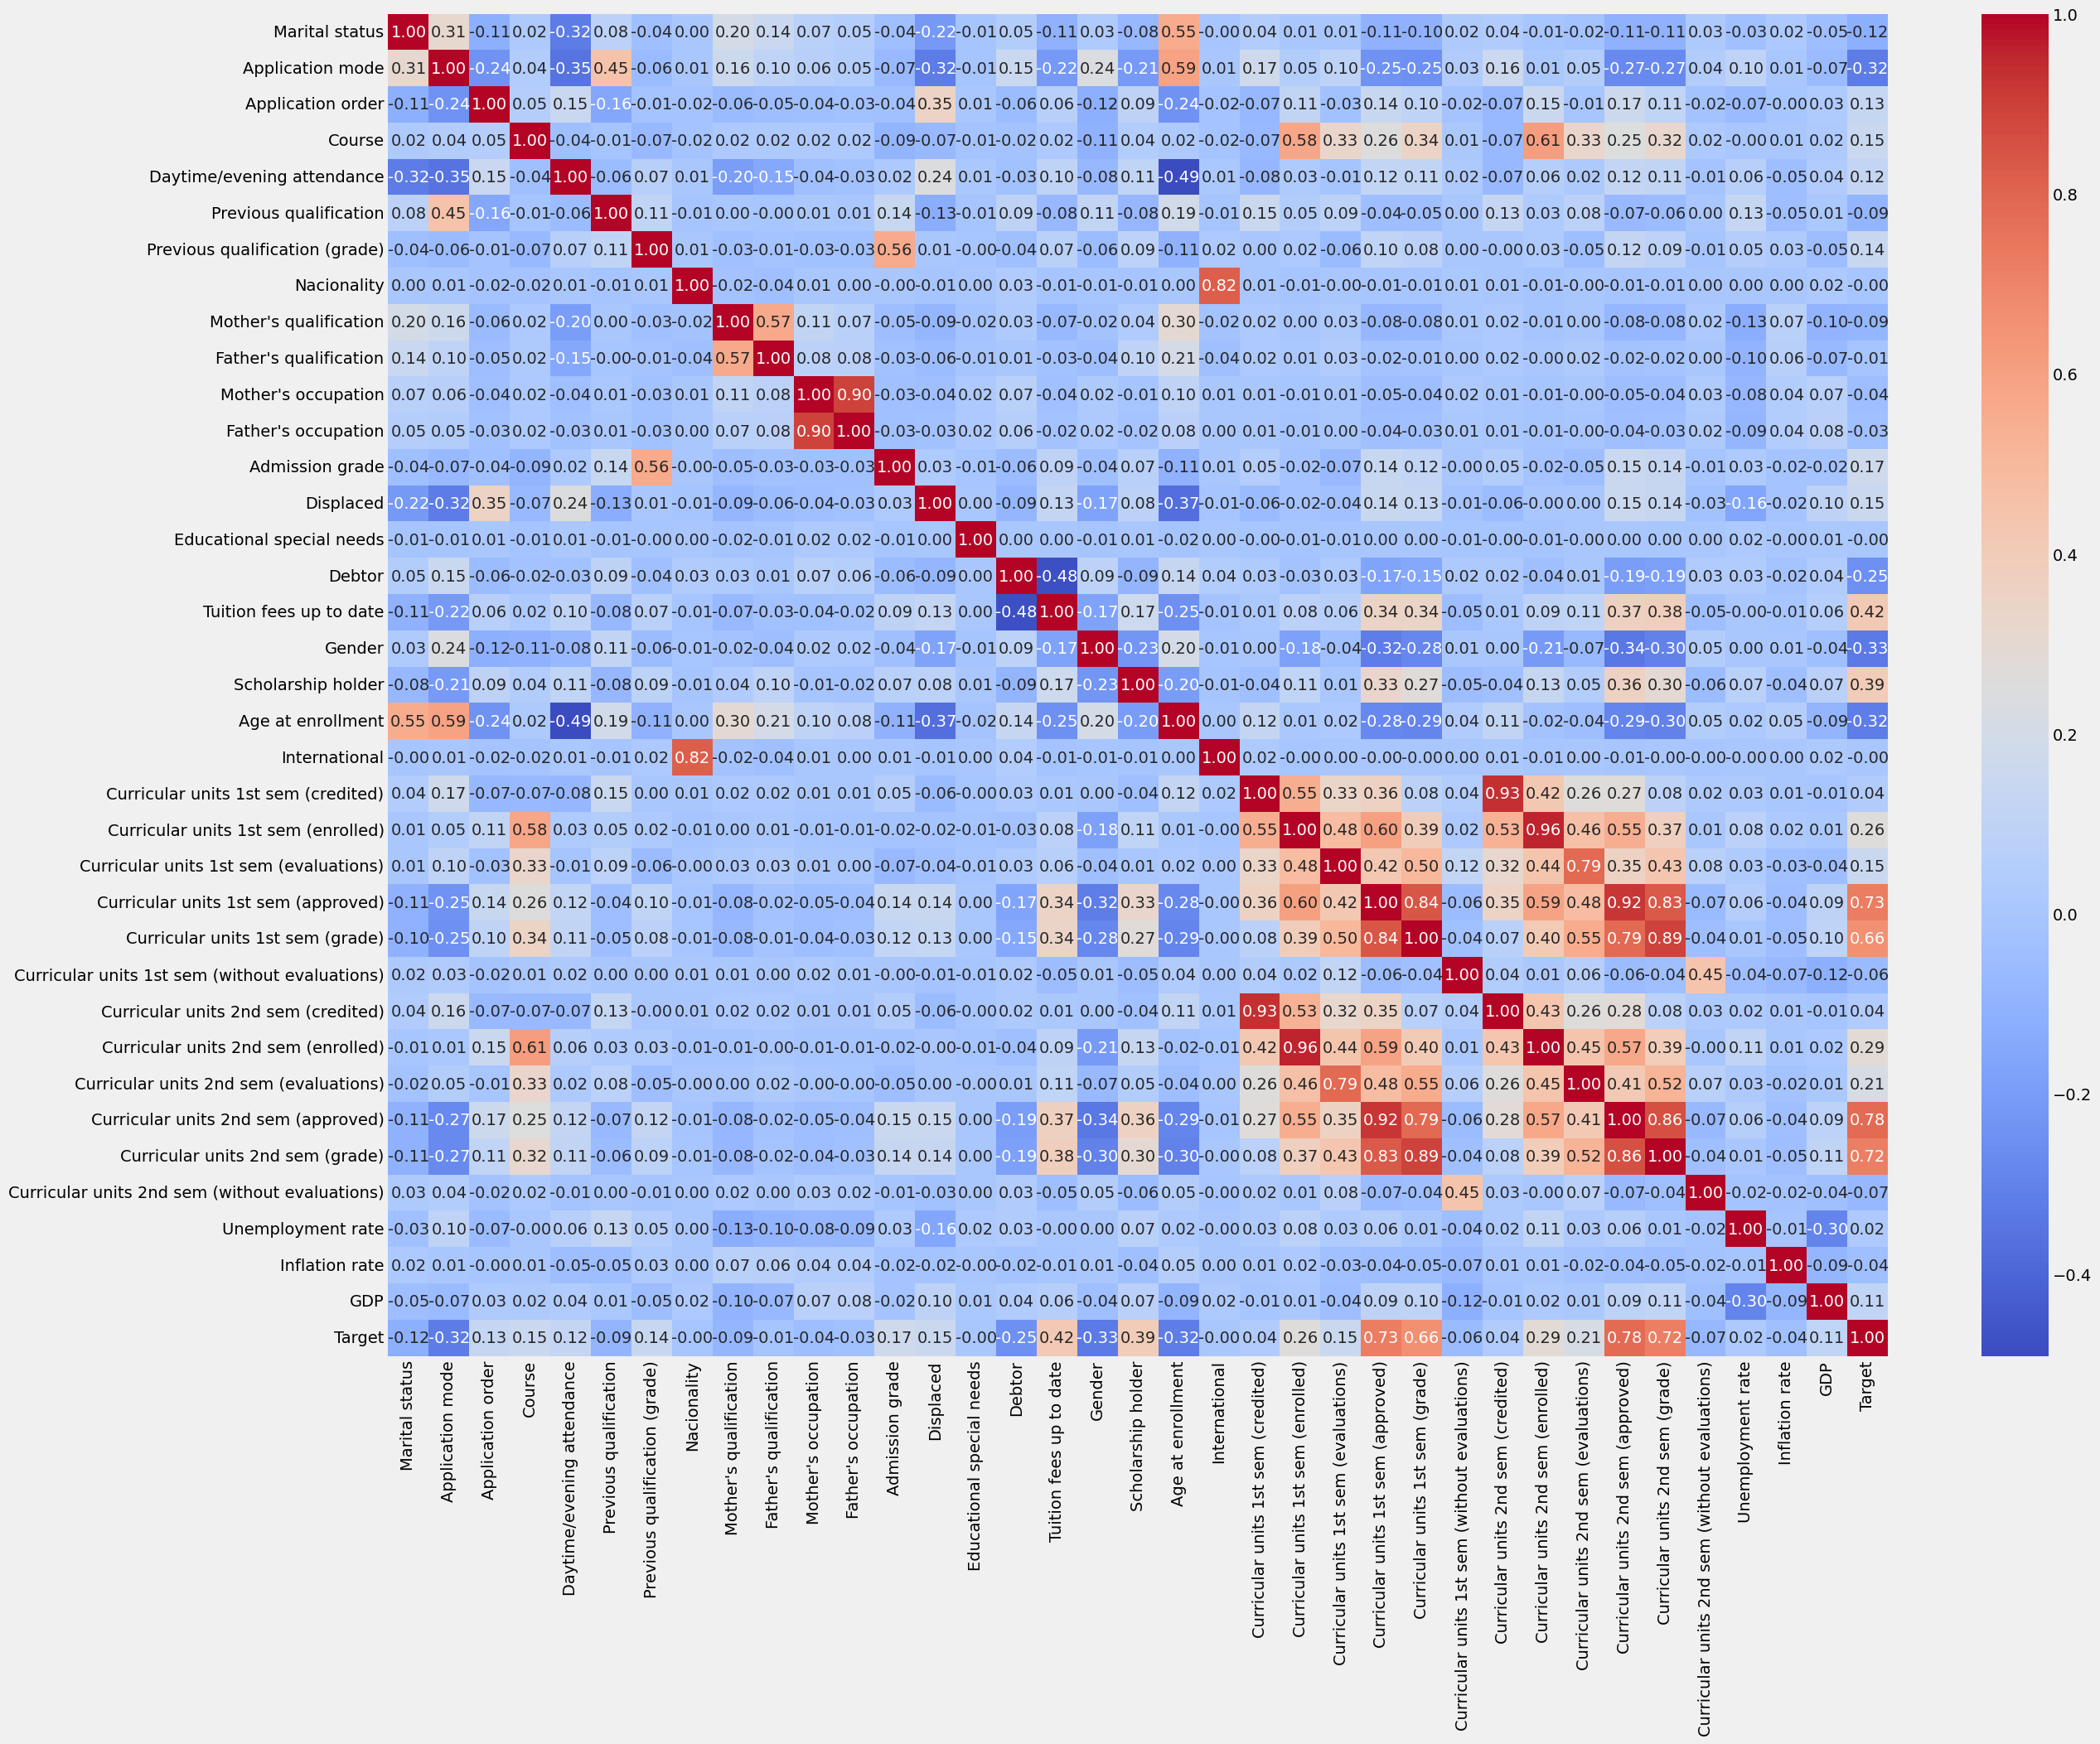

In [82]:
plt.figure(figsize=(26,20))

sn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### vi) Visualizing the corrleation with respect to the labeled column

<Axes: >

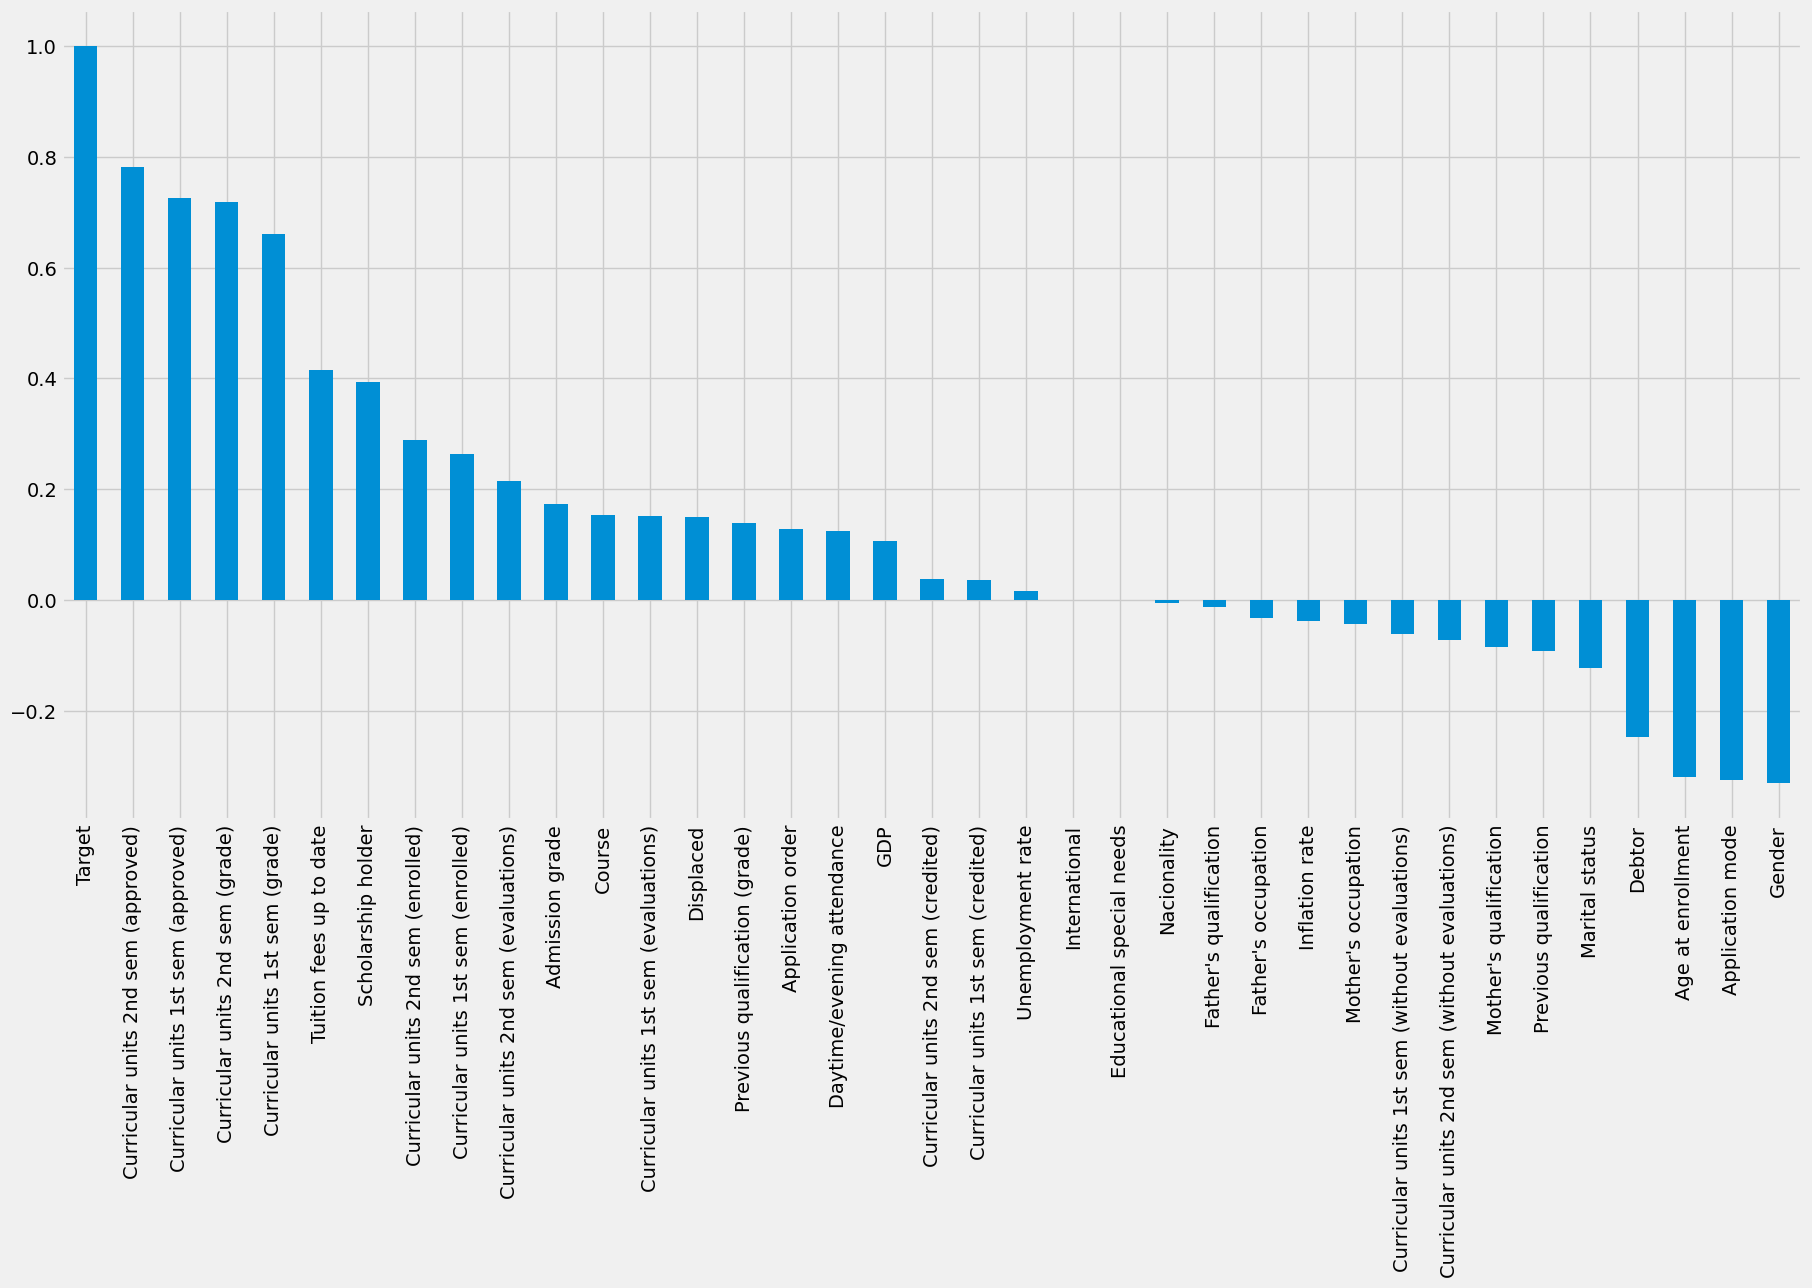

In [85]:
df.corr()['Target'].sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(20,10))

-------

## Train Test Split

In [86]:
X=df.drop('Target',axis=1)
Y=df['Target']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [89]:
print(X.shape,X_train.shape,X_test.shape)

(76518, 36) (61214, 36) (15304, 36)


-------

## Scaling the data

In [90]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [91]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [92]:
X_train

array([[-0.25306256,  0.05434629,  0.28741719, ..., -0.27227054,
         0.12407006,  0.80796834],
       [-0.25306256,  1.37206226, -0.52531174, ...,  1.75942716,
        -0.66335153, -0.37488209],
       [-0.25306256,  0.05434629, -0.52531174, ..., -1.47623954,
         0.98307542,  0.17652187],
       ...,
       [-0.25306256,  1.61164698, -0.52531174, ...,  1.75942716,
        -0.66335153, -0.37488209],
       [-0.25306256, -0.9039926 ,  0.28741719, ..., -0.79900698,
        -1.45077312, -1.35317943],
       [-0.25306256,  1.67154316, -0.52531174, ...,  0.32971396,
        -0.52018397,  0.83020237]])

------

## Model Training

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [94]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Metrics custom function

In [96]:
def metrics_info(model):
    y_pred=model.predict(X_test)
    
    test_acc=accuracy_score(Y_test,y_pred)
    conf=confusion_matrix(Y_test,y_pred)
    report=classification_report(Y_test,y_pred)
    
    y1_pred=model.predict(X_train)
    train_acc=accuracy_score(Y_train, y1_pred)
    
    print('Training Accuracy: ',train_acc)
    print('Testing Accuracy: ',test_acc)
    
    print(" ")
    print("Confusion Matrix: ")
    print("**************************")
    print(conf)
    
    print(" ")
    print("Classification Report: ")
    print("**************************")
    print(report)

### a) Logistic Regression

In [97]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

#### a) Metrices information

In [98]:
metrics_info(lr)

Training Accuracy:  0.8180481589178946
Testing Accuracy:  0.814035546262415
 
Confusion Matrix: 
**************************
[[4081  616  329]
 [ 363 1678  979]
 [ 146  413 6699]]
 
Classification Report: 
**************************
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      5026
           1       0.62      0.56      0.59      3020
           2       0.84      0.92      0.88      7258

    accuracy                           0.81     15304
   macro avg       0.78      0.76      0.77     15304
weighted avg       0.81      0.81      0.81     15304



### ii) RandomForest

In [99]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

#### a) Metrices information

In [101]:
metrics_info(rf)

Training Accuracy:  0.999950991603228
Testing Accuracy:  0.8212232096184005
 
Confusion Matrix: 
**************************
[[4113  559  354]
 [ 384 1773  863]
 [ 110  466 6682]]
 
Classification Report: 
**************************
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      5026
           1       0.63      0.59      0.61      3020
           2       0.85      0.92      0.88      7258

    accuracy                           0.82     15304
   macro avg       0.79      0.78      0.78     15304
weighted avg       0.82      0.82      0.82     15304



#### b) Feature importances

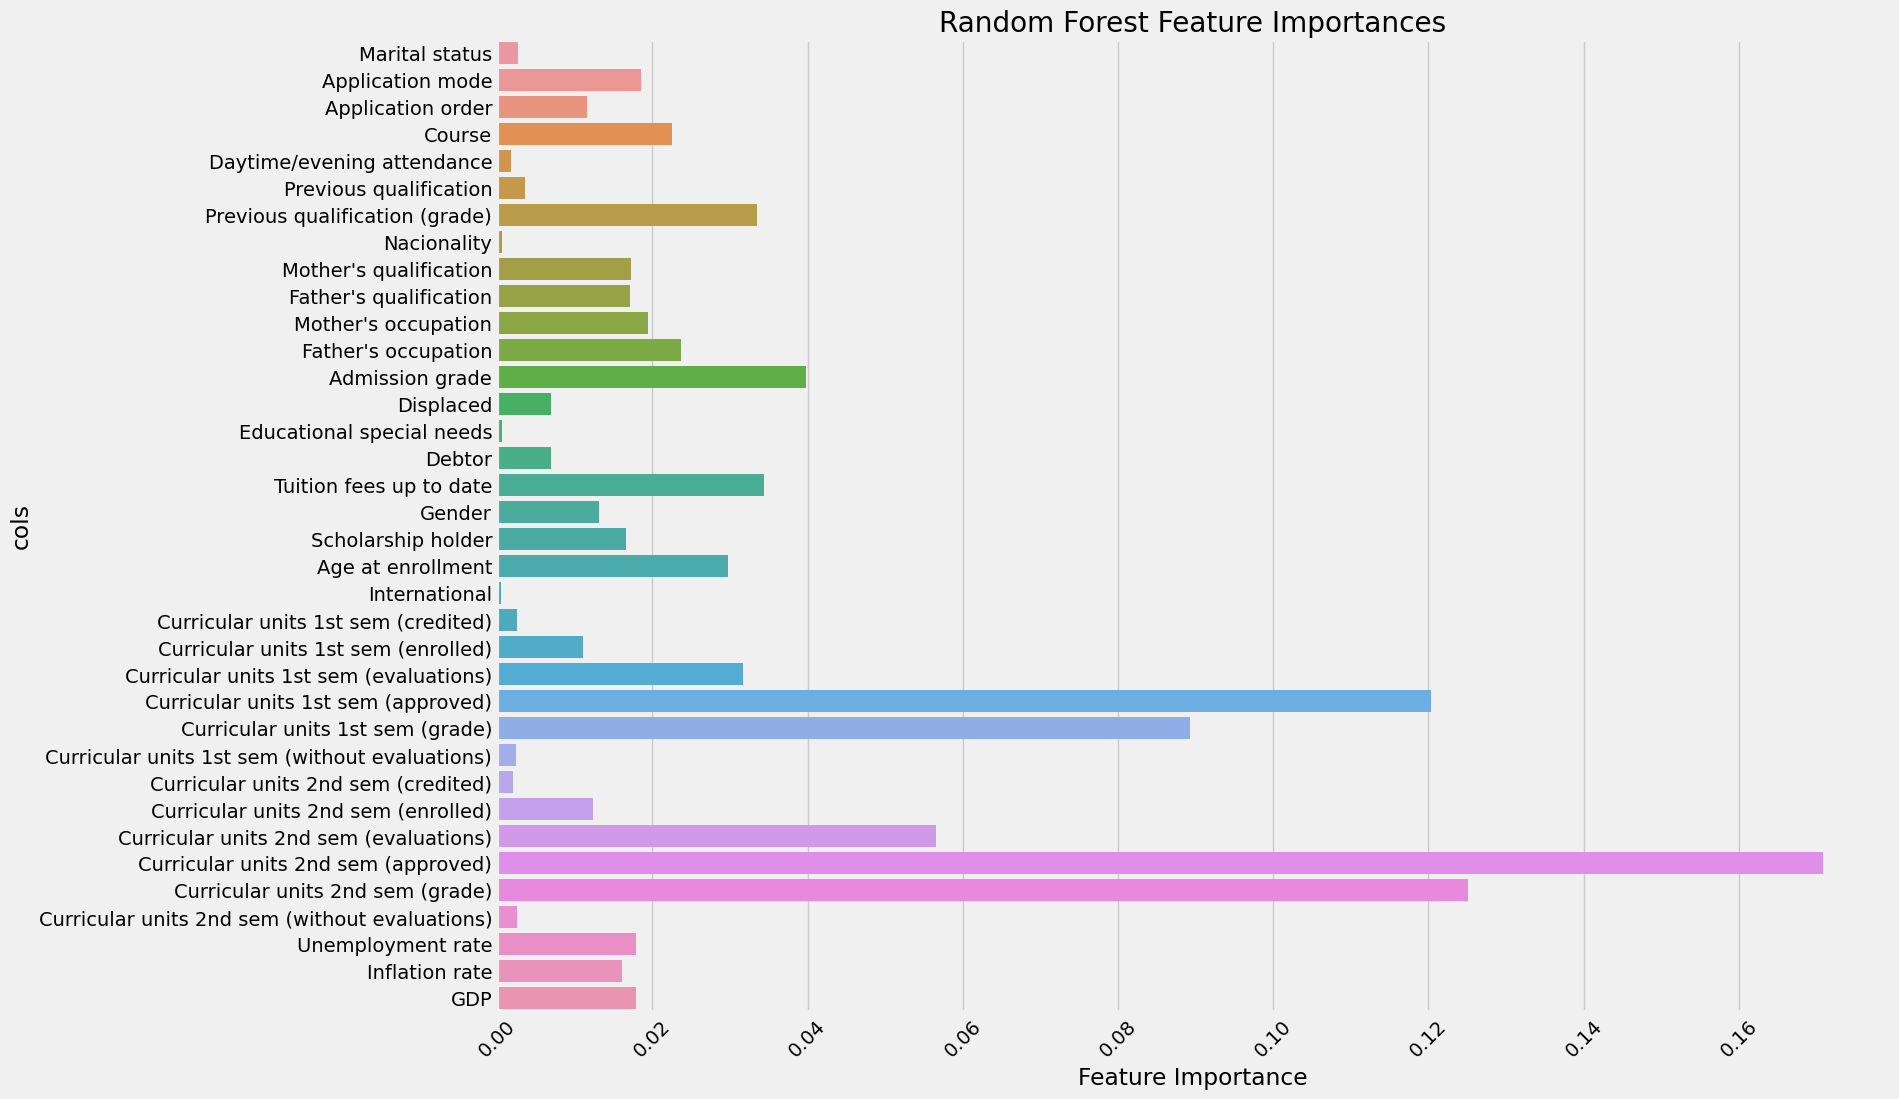

In [161]:
plt.figure(figsize=(16,12))
f_importances=pd.DataFrame({'cols': X.columns, 'Feature Importance': rf.feature_importances_})

sn.barplot(y='cols', x='Feature Importance', data=f_importances)
plt.xticks(rotation=45)

plt.title('Random Forest Feature Importances')
plt.show()

### c) Gradient Boosting

In [102]:
gr=GradientBoostingClassifier()
gr.fit(X_train,Y_train)

GradientBoostingClassifier()

#### a) Metrices information

In [103]:
metrics_info(gr)

Training Accuracy:  0.8309373672689254
Testing Accuracy:  0.8242289597490852
 
Confusion Matrix: 
**************************
[[4120  555  351]
 [ 361 1820  839]
 [ 112  472 6674]]
 
Classification Report: 
**************************
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5026
           1       0.64      0.60      0.62      3020
           2       0.85      0.92      0.88      7258

    accuracy                           0.82     15304
   macro avg       0.79      0.78      0.79     15304
weighted avg       0.82      0.82      0.82     15304



#### b) Feature importances

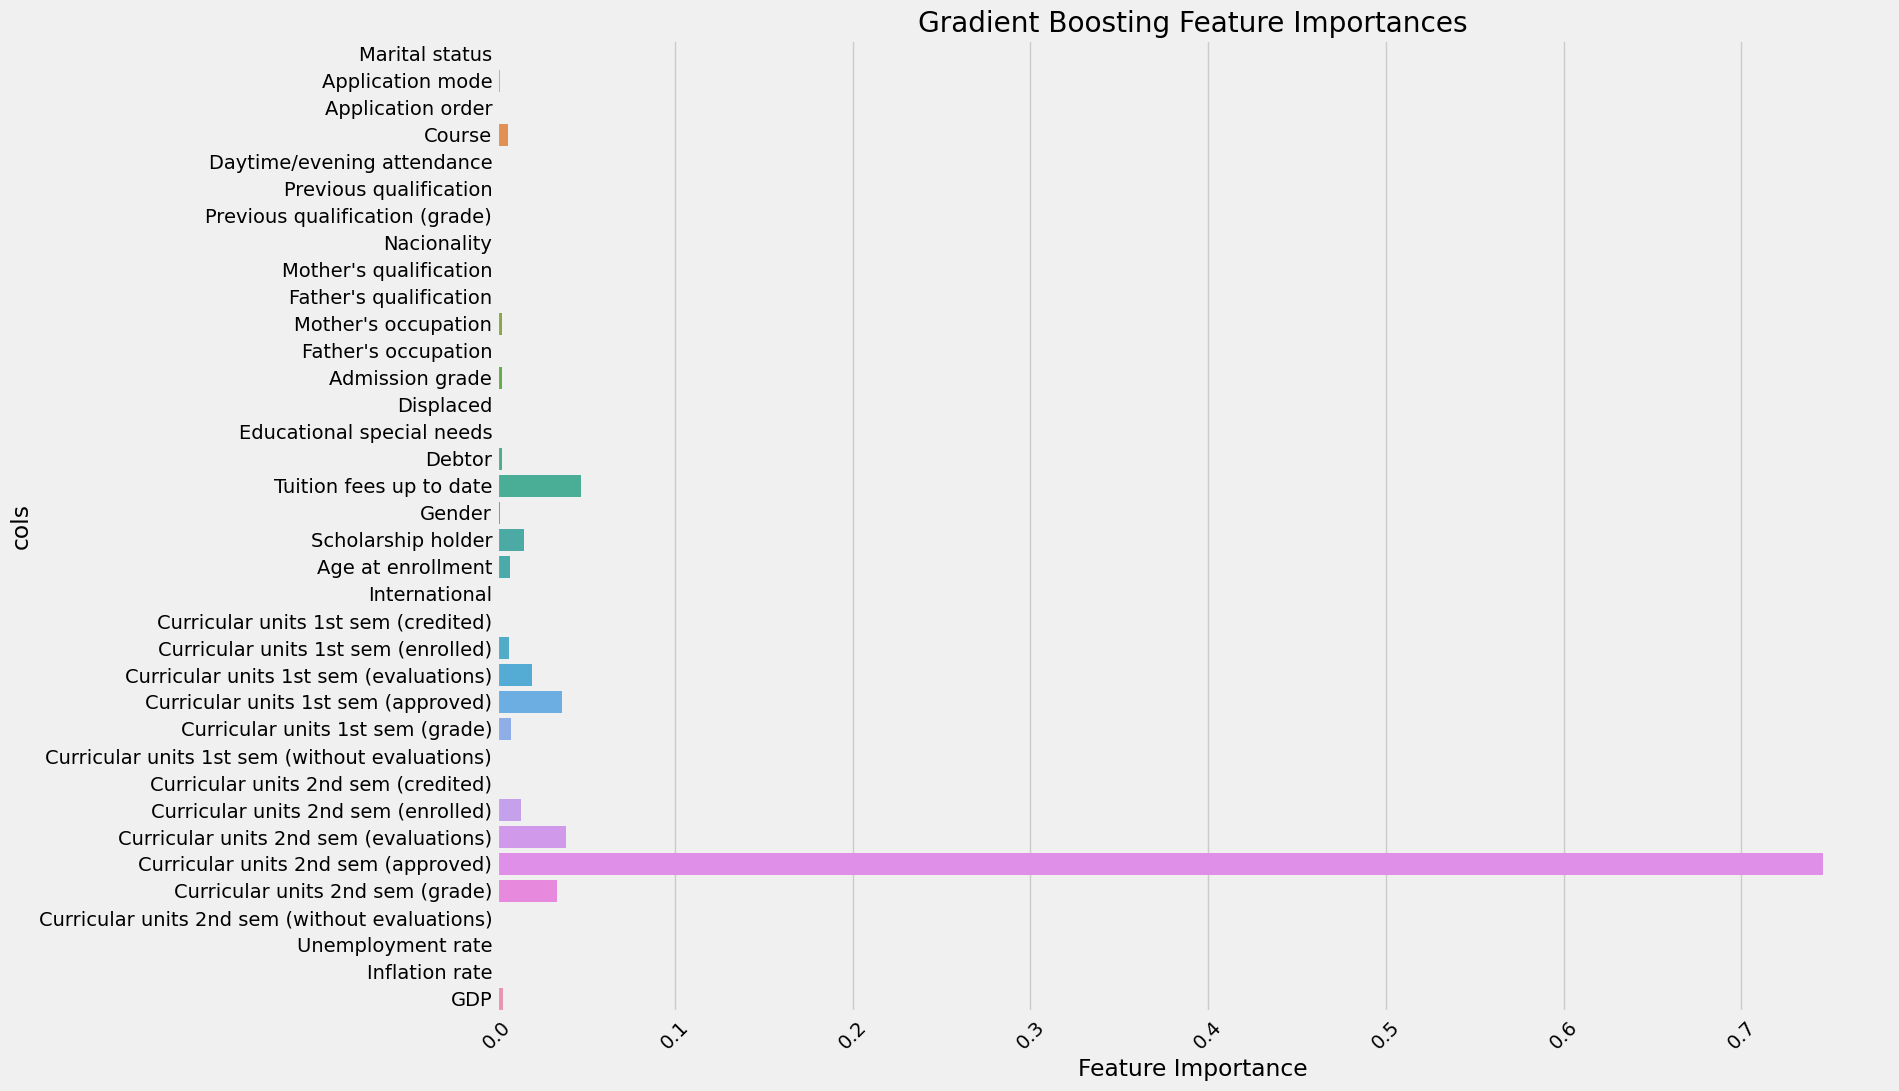

In [162]:
plt.figure(figsize=(16,12))
f_importances=pd.DataFrame({'cols': X.columns, 'Feature Importance': gr.feature_importances_})

sn.barplot(y='cols', x='Feature Importance', data=f_importances)
plt.xticks(rotation=45)

plt.title('Gradient Boosting Feature Importances')
plt.show()

### d) XGBoost

In [104]:
xg=XGBClassifier()
xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### a) Metrices information

In [105]:
metrics_info(xg)

Training Accuracy:  0.8839154441794361
Testing Accuracy:  0.8305671719811814
 
Confusion Matrix: 
**************************
[[4183  495  348]
 [ 370 1859  791]
 [ 120  469 6669]]
 
Classification Report: 
**************************
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5026
           1       0.66      0.62      0.64      3020
           2       0.85      0.92      0.89      7258

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



#### b) Feature importances

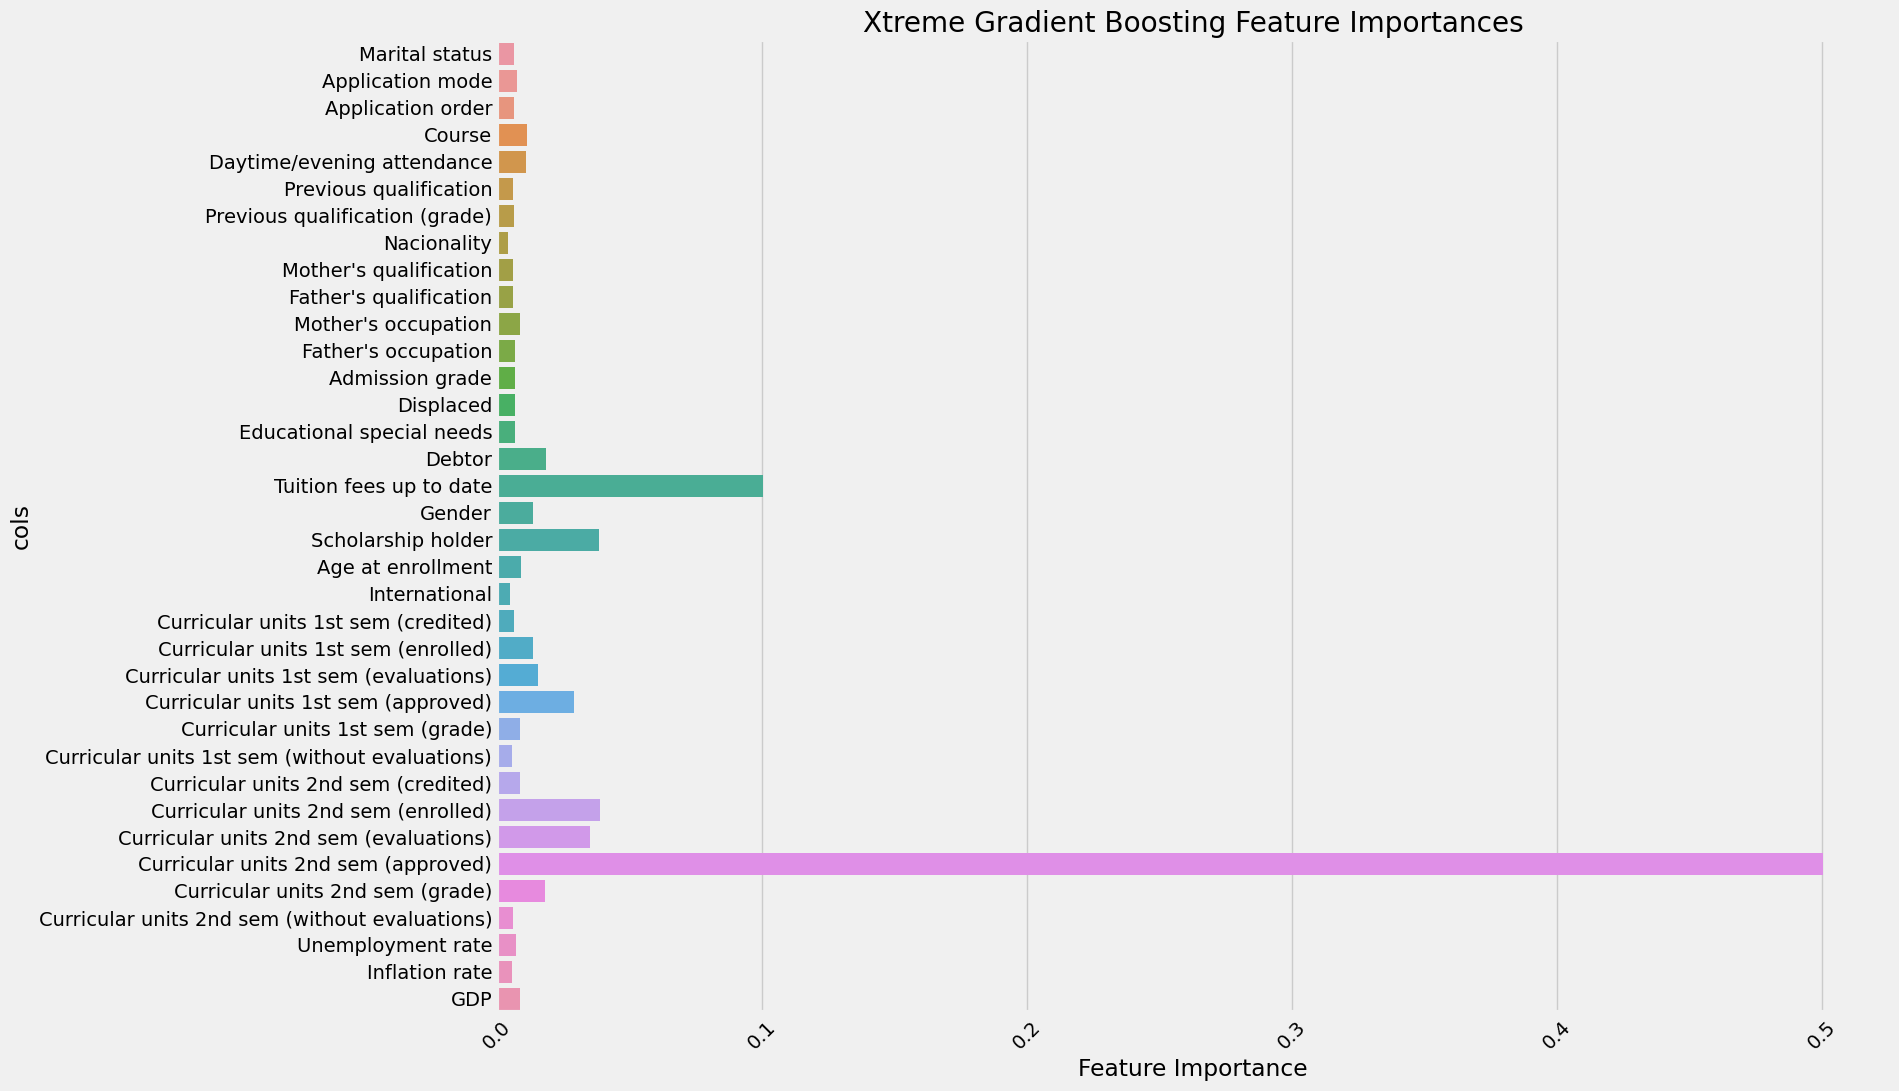

In [163]:
plt.figure(figsize=(16,12))
f_importances=pd.DataFrame({'cols': X.columns, 'Feature Importance': xg.feature_importances_})

sn.barplot(y='cols', x='Feature Importance', data=f_importances)
plt.xticks(rotation=45)

plt.title('Xtreme Gradient Boosting Feature Importances')
plt.show()

### e) LGBM

In [106]:
lg=LGBMClassifier()
lg.fit(X_train,Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1396
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 36
[LightGBM] [Info] Start training from score -1.105234
[LightGBM] [Info] Start training from score -1.636158
[LightGBM] [Info] Start training from score -0.746253


LGBMClassifier()

#### a) Metrices information

In [107]:
metrics_info(lg)

Training Accuracy:  0.8501486588035416
Testing Accuracy:  0.8284108729743858
 
Confusion Matrix: 
**************************
[[4130  557  339]
 [ 347 1864  809]
 [ 106  468 6684]]
 
Classification Report: 
**************************
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5026
           1       0.65      0.62      0.63      3020
           2       0.85      0.92      0.89      7258

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



#### b) Feature importances

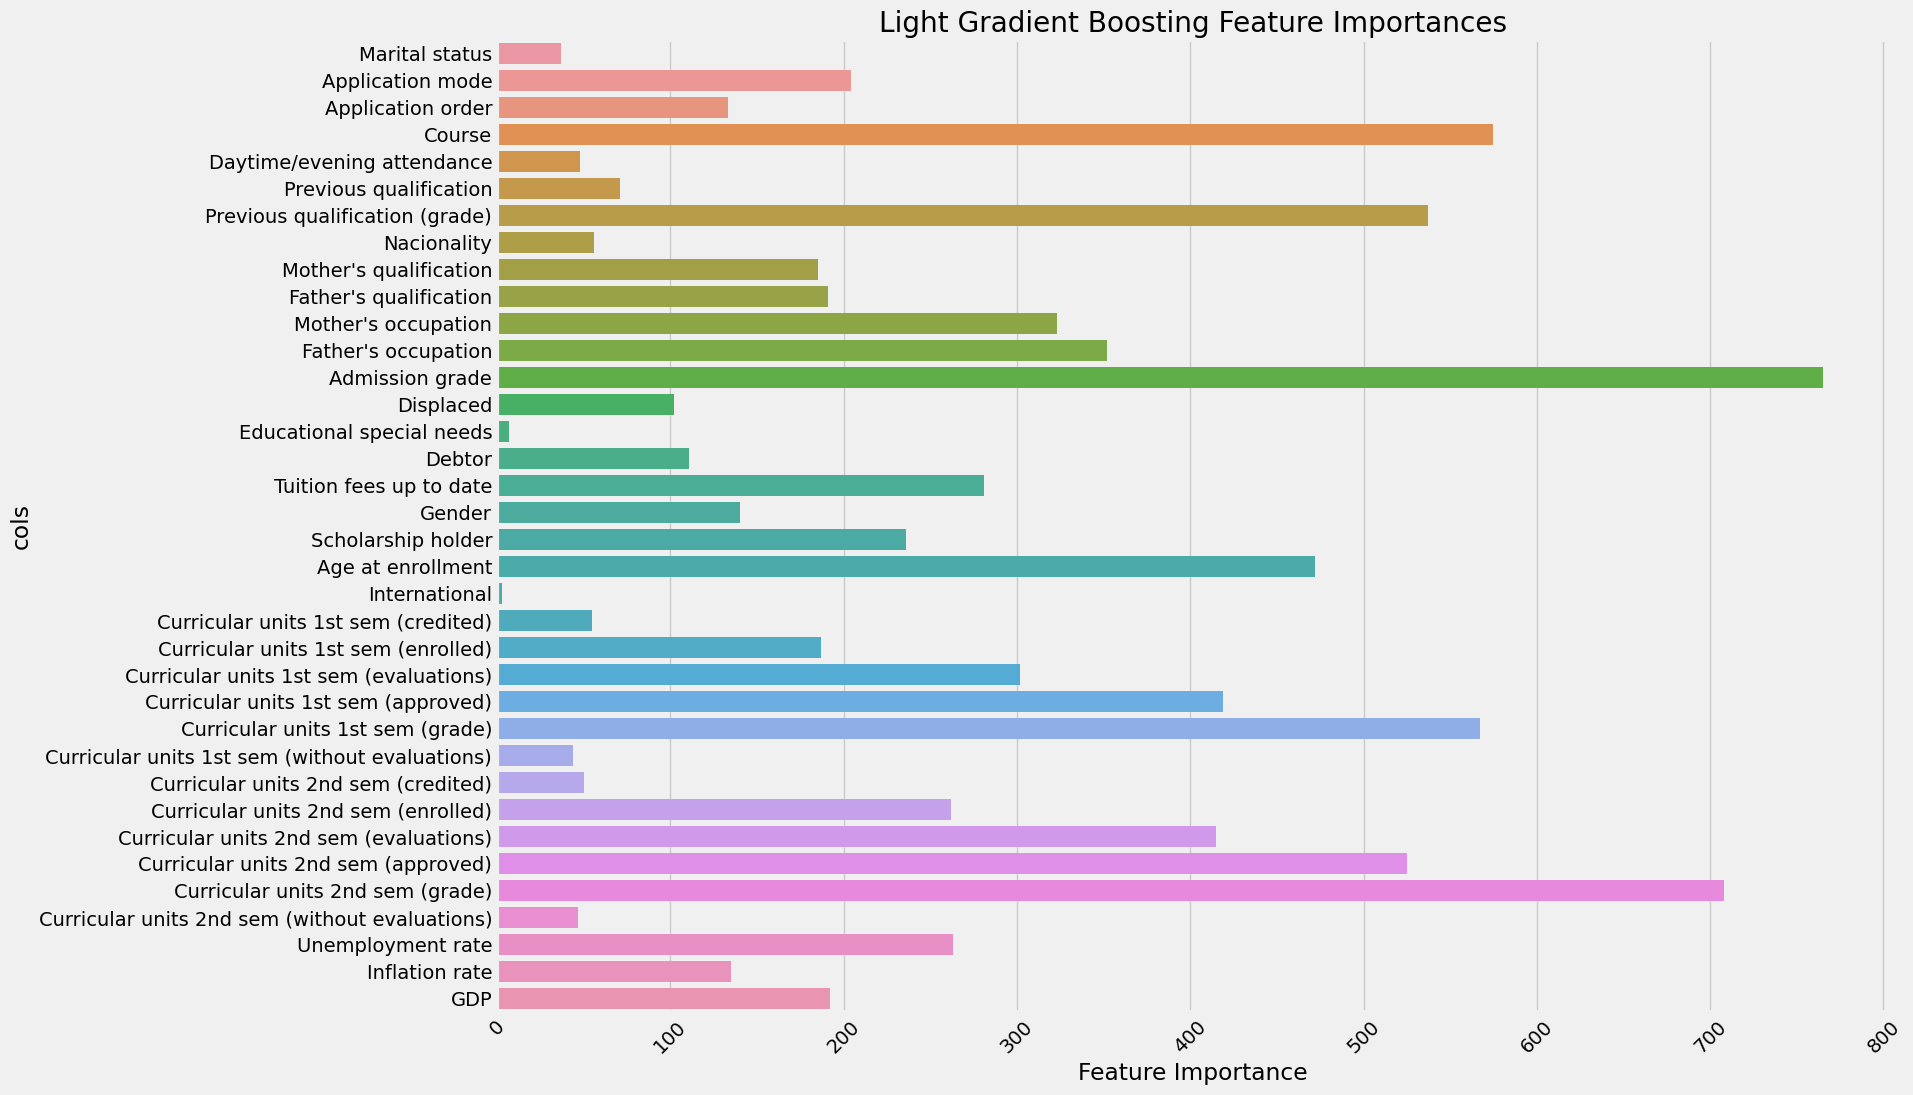

In [164]:
plt.figure(figsize=(16,12))
f_importances=pd.DataFrame({'cols': X.columns, 'Feature Importance': lg.feature_importances_})

sn.barplot(y='cols', x='Feature Importance', data=f_importances)
plt.xticks(rotation=45)

plt.title('Light Gradient Boosting Feature Importances')
plt.show()

### f) Catboost

In [108]:
ct=CatBoostClassifier()
ct.fit(X_train,Y_train)

Learning rate set to 0.097601
0:	learn: 0.9951548	total: 81.1ms	remaining: 1m 21s
1:	learn: 0.9160440	total: 111ms	remaining: 55.2s
2:	learn: 0.8534410	total: 139ms	remaining: 46.1s
3:	learn: 0.8019220	total: 167ms	remaining: 41.6s
4:	learn: 0.7580897	total: 199ms	remaining: 39.6s
5:	learn: 0.7208079	total: 228ms	remaining: 37.8s
6:	learn: 0.6916538	total: 258ms	remaining: 36.6s
7:	learn: 0.6652322	total: 286ms	remaining: 35.5s
8:	learn: 0.6428145	total: 314ms	remaining: 34.6s
9:	learn: 0.6221455	total: 342ms	remaining: 33.9s
10:	learn: 0.6042648	total: 369ms	remaining: 33.2s
11:	learn: 0.5897114	total: 397ms	remaining: 32.7s
12:	learn: 0.5763027	total: 438ms	remaining: 33.3s
13:	learn: 0.5644798	total: 481ms	remaining: 33.9s
14:	learn: 0.5543032	total: 510ms	remaining: 33.5s
15:	learn: 0.5455483	total: 540ms	remaining: 33.2s
16:	learn: 0.5368969	total: 570ms	remaining: 33s
17:	learn: 0.5295823	total: 600ms	remaining: 32.7s
18:	learn: 0.5232906	total: 627ms	remaining: 32.4s
19:	learn: 

#### a) Metrices information

In [109]:
metrics_info(ct)

Training Accuracy:  0.8645571274545039
Testing Accuracy:  0.8288029273392578
 
Confusion Matrix: 
**************************
[[4164  517  345]
 [ 368 1829  823]
 [ 115  452 6691]]
 
Classification Report: 
**************************
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5026
           1       0.65      0.61      0.63      3020
           2       0.85      0.92      0.89      7258

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



#### b) Feature importances

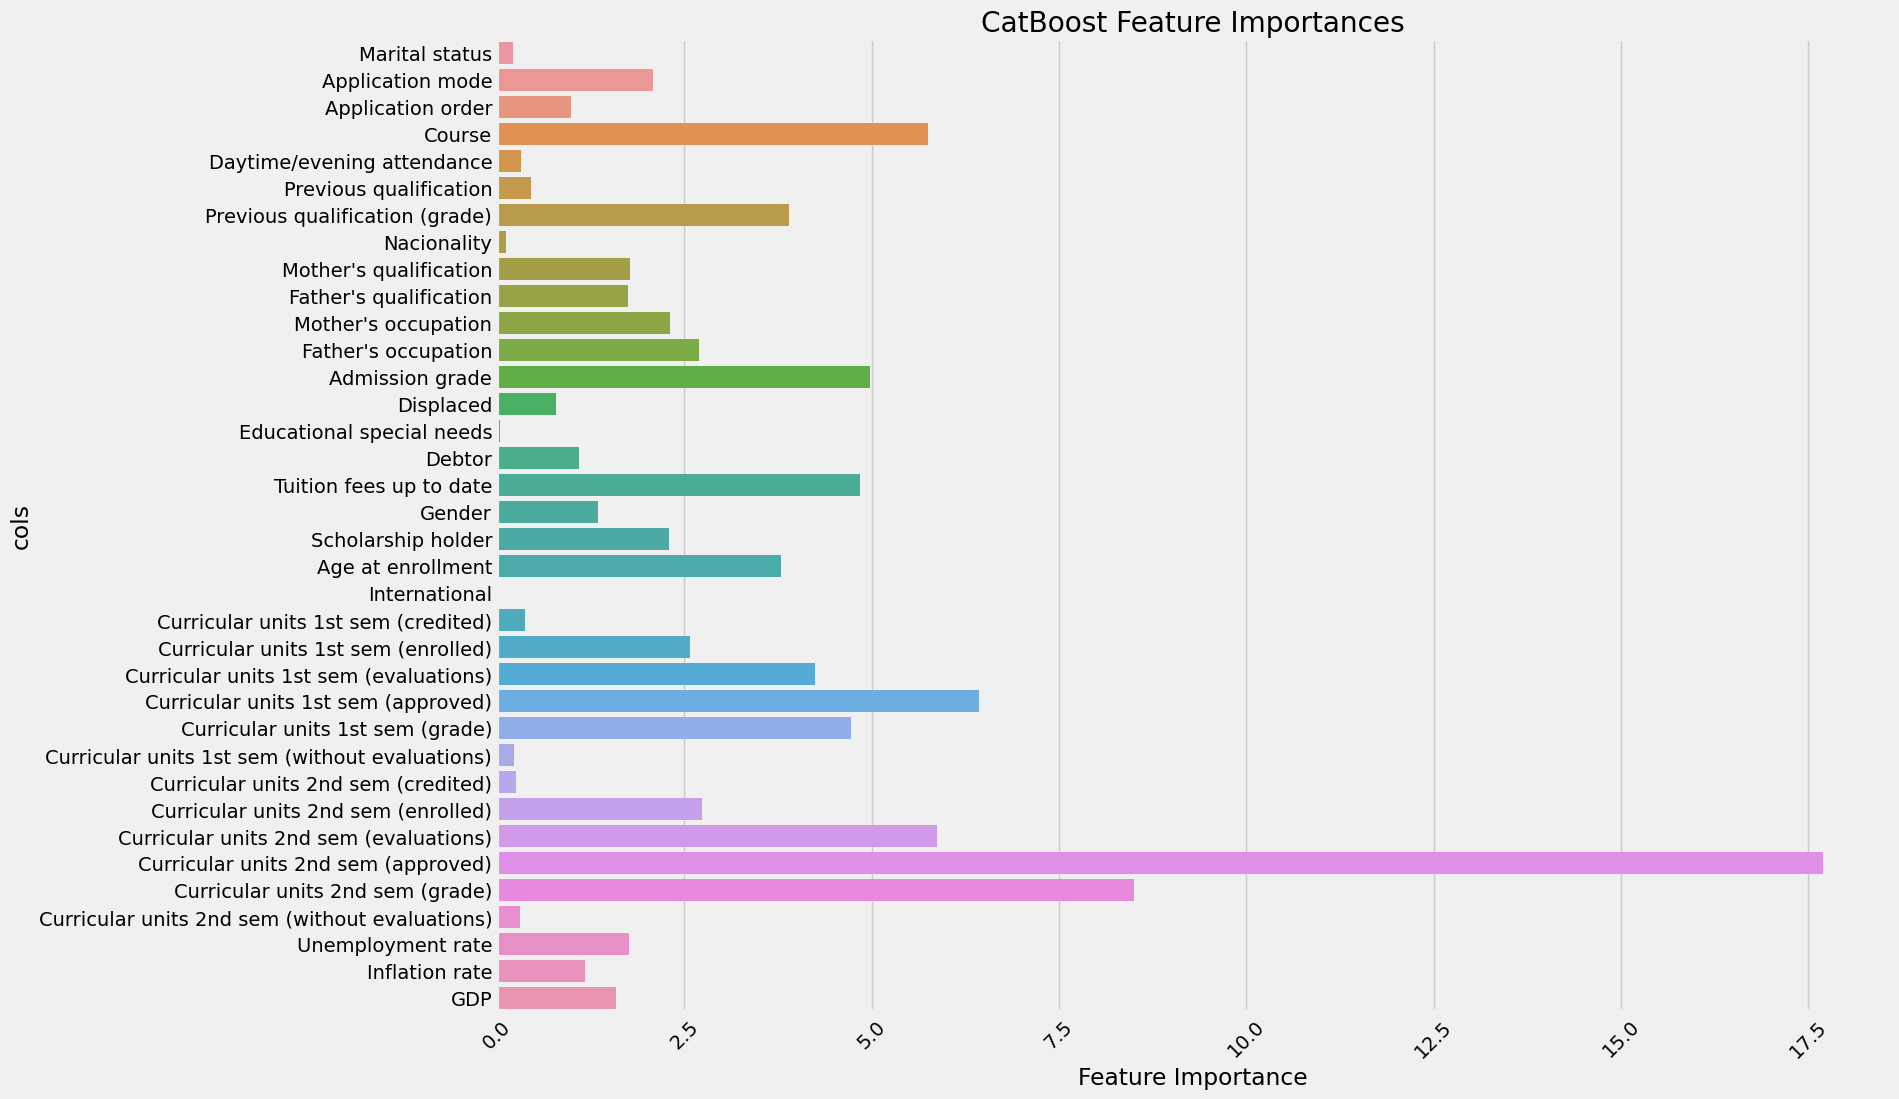

In [165]:
plt.figure(figsize=(16,12))
f_importances=pd.DataFrame({'cols': X.columns, 'Feature Importance': ct.feature_importances_})

sn.barplot(y='cols', x='Feature Importance', data=f_importances)
plt.xticks(rotation=45)

plt.title('CatBoost Feature Importances')
plt.show()

### g) Decision Tree

In [110]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

#### a) Metrices information

In [111]:
metrics_info(dt)

Training Accuracy:  1.0
Testing Accuracy:  0.7334683742812337
 
Confusion Matrix: 
**************************
[[3905  704  417]
 [ 694 1428  898]
 [ 415  951 5892]]
 
Classification Report: 
**************************
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5026
           1       0.46      0.47      0.47      3020
           2       0.82      0.81      0.81      7258

    accuracy                           0.73     15304
   macro avg       0.69      0.69      0.69     15304
weighted avg       0.73      0.73      0.73     15304



#### b) Feature importances

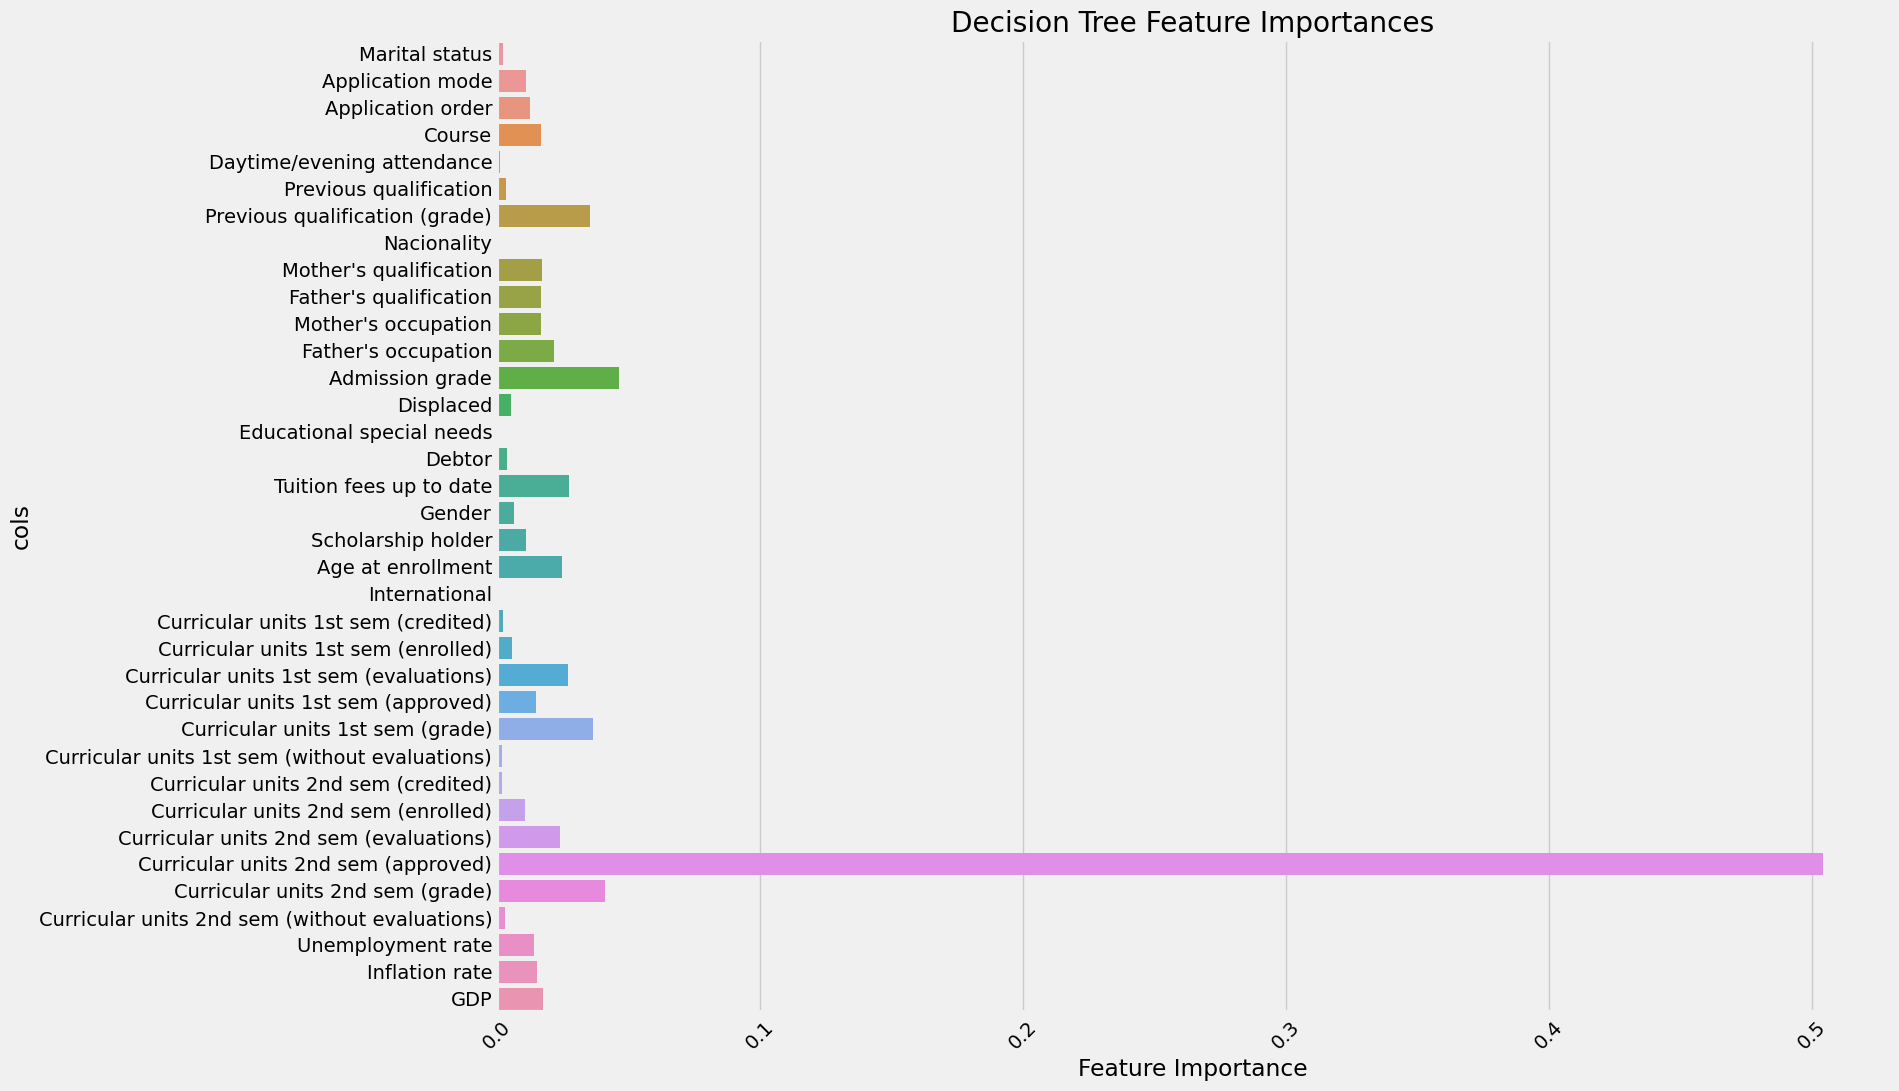

In [166]:
plt.figure(figsize=(16,12))
f_importances=pd.DataFrame({'cols': X.columns, 'Feature Importance': dt.feature_importances_})

sn.barplot(y='cols', x='Feature Importance', data=f_importances)
plt.xticks(rotation=45)

plt.title('Decision Tree Feature Importances')
plt.show()

### h) AdaBoost Classifier

In [112]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)

AdaBoostClassifier()

#### a) Metrices information

In [114]:
metrics_info(ad)

Training Accuracy:  0.8189793184565622
Testing Accuracy:  0.8148849973863043
 
Confusion Matrix: 
**************************
[[3999  686  341]
 [ 309 1802  909]
 [ 155  433 6670]]
 
Classification Report: 
**************************
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      5026
           1       0.62      0.60      0.61      3020
           2       0.84      0.92      0.88      7258

    accuracy                           0.81     15304
   macro avg       0.79      0.77      0.78     15304
weighted avg       0.82      0.81      0.81     15304



#### b) Feature importances

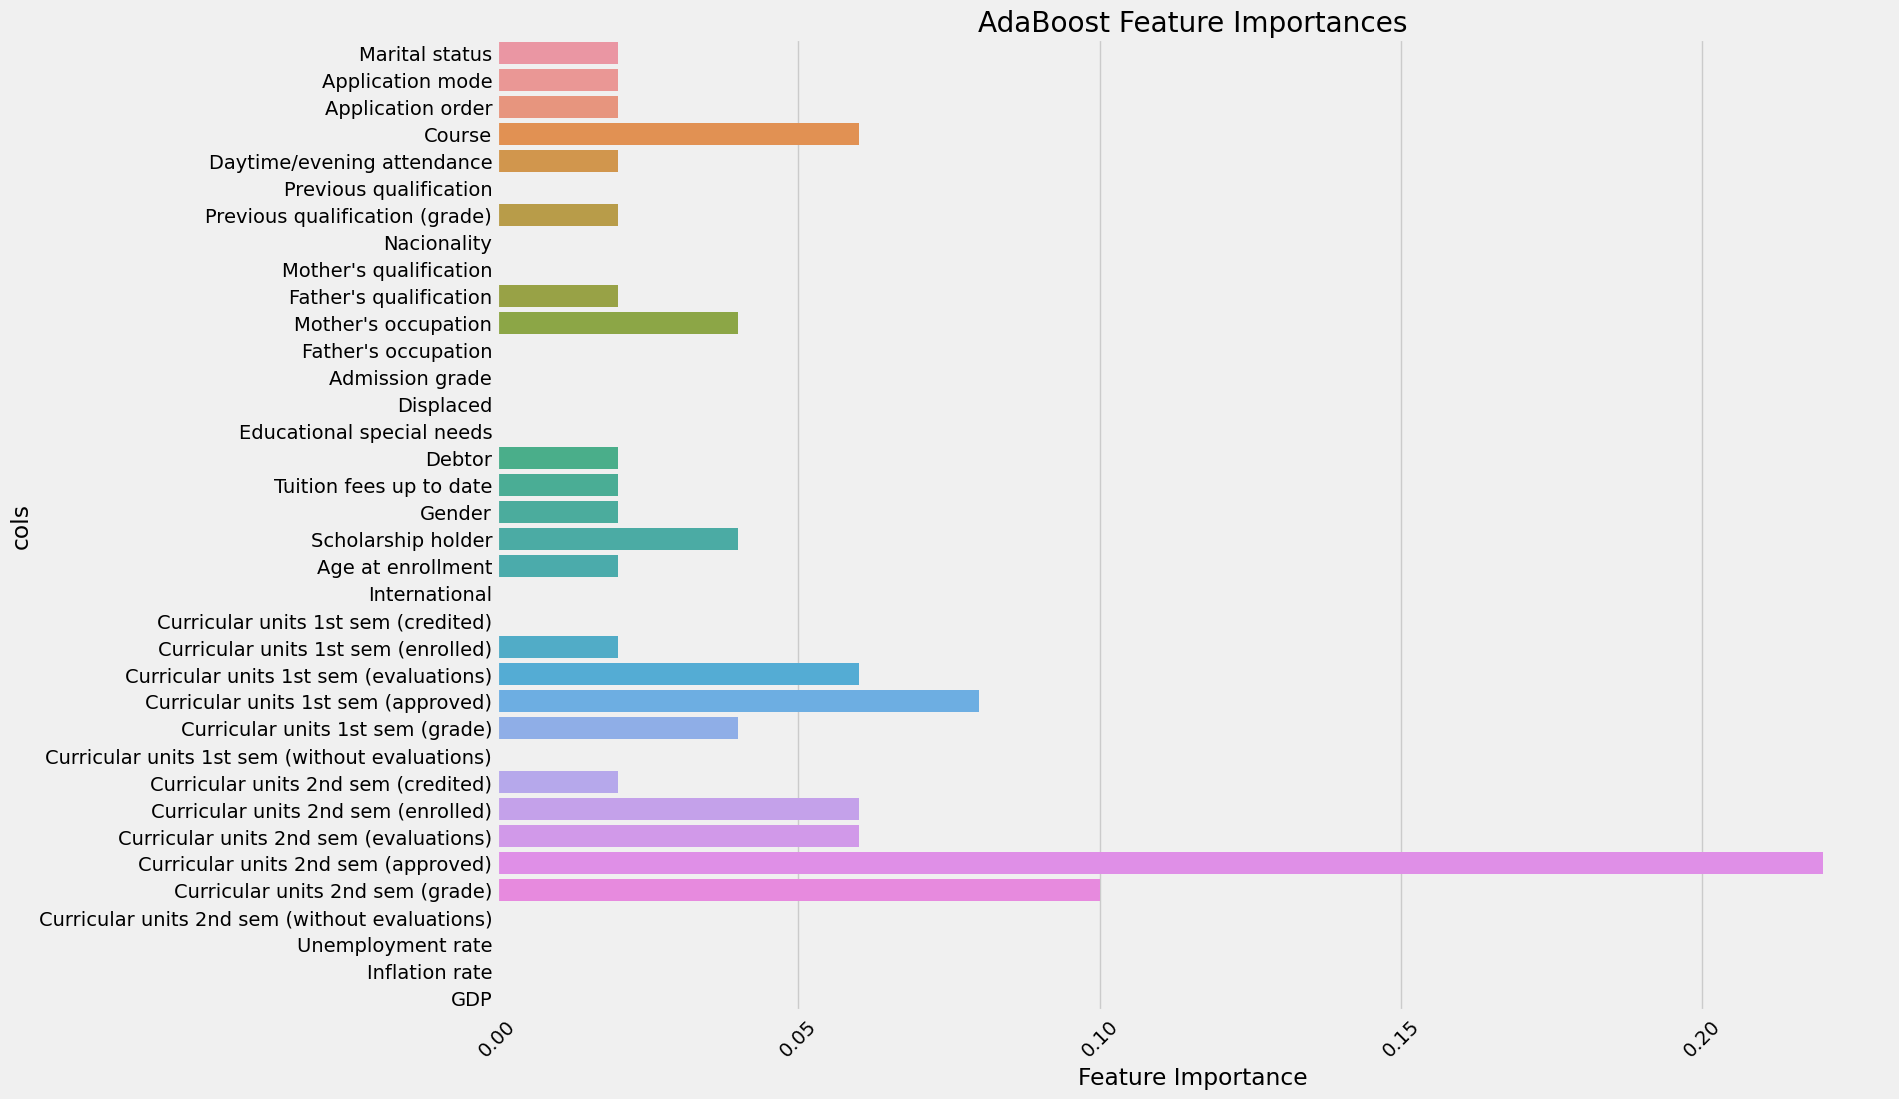

In [167]:
plt.figure(figsize=(16,12))
f_importances=pd.DataFrame({'cols': X.columns, 'Feature Importance': ad.feature_importances_})

sn.barplot(y='cols', x='Feature Importance', data=f_importances)
plt.xticks(rotation=45)

plt.title('AdaBoost Feature Importances')
plt.show()

#### By utilizing model performance we will choose our best model as XGBoost

-----------

# 2. On Test Set

In [116]:
test=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')

#### Coping the dataset for future tasks

In [117]:
test_copy=test.copy()

#### Showing the first five rows of test dataset

In [118]:
test.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 37 columns]

#### Showing the shape of the test dataset

In [119]:
test.shape

(51012, 37)

#### Showing the information of the test dataset

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

#### Showing the null values of the test dataset

In [121]:
test.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

#### Showing the duplicate values of the test dataset

In [122]:
test.duplicated().sum()

0

#### Dropping id column of the test dataset

In [123]:
test.drop('id', axis=1,inplace=True)

In [124]:
test.shape

(51012, 36)

### Scaling the test dataset

In [125]:
test=sc.transform(test)

# 3. Kaggle Submission

## Using Inverse transform feature to get the labeled column names and then using our best model to predict the test data

In [142]:
xgb_preds = gr.predict(test)
xgb_preds_labels = lb.inverse_transform(xgb_preds)


# Save the predictions to a CSV file
xgb_result = pd.DataFrame({'id': test_copy['id'], 'Target':xgb_preds_labels })

xgb_result

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

## Convert our dataframe into the csv files for submission.

In [143]:
xgb_result.to_csv('submission_gr.csv', index=False)

-------

### Dumping the model for deployment

In [169]:
import pickle

pickle.dump(xg, open('xg_model.pkl', 'wb'))

--------

## Prediction

### Prediction Function

In [183]:
def predict(gr,sc,Marital_status, Application_mode, Application_order, Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification, Fathers_qualification,Mothers_occupation, Fathers_occupation, Admission_grade,
       Displaced, Educational_special_needs, Debtor,
       Tuition_fees_up_to_date, Gender, Scholarship_holder,
       Age_at_enrollment, International,
       Curricular_units_1st_sem_credited,
       Curricular_units_1st_sem_enrolled,
       Curricular_units_1st_sem_evaluations,
       Curricular_units_1st_sem_approved,
       Curricular_units_1st_sem_grade,
       Curricular_units_1st_sem_without_evaluations,
       Curricular_units_2nd_sem_credited,
       Curricular_units_2nd_sem_enrolled,
       Curricular_units_2nd_sem_evaluations,
       Curricular_units_2nd_sem_approved,
       Curricular_units_2nd_sem_grade,
       Curricular_units_2nd_sem_without_evaluations, Unemployment_rate,
       Inflation_rate, GDP ):
    
    features=np.array([[Marital_status, Application_mode, Application_order, Course,Daytime_evening_attendance,Previous_qualification
       ,Previous_qualification_grade,Nacionality,
       Mothers_qualification, Fathers_qualification,
       Mothers_occupation, Fathers_occupation, Admission_grade,
       Displaced, Educational_special_needs, Debtor,
       Tuition_fees_up_to_date, Gender, Scholarship_holder,
       Age_at_enrollment, International,
       Curricular_units_1st_sem_credited,
       Curricular_units_1st_sem_enrolled,
       Curricular_units_1st_sem_evaluations,
       Curricular_units_1st_sem_approved,
       Curricular_units_1st_sem_grade,
       Curricular_units_1st_sem_without_evaluations,
       Curricular_units_2nd_sem_credited,
       Curricular_units_2nd_sem_enrolled,
       Curricular_units_2nd_sem_evaluations,
       Curricular_units_2nd_sem_approved,
       Curricular_units_2nd_sem_grade,
       Curricular_units_2nd_sem_without_evaluations, Unemployment_rate,
       Inflation_rate, GDP]])
    
    # scaling
    scaled_features=sc.transform(features)
    
    # Prediction
    result=gr.predict(scaled_features)
    
    return result

### Test case 

In [184]:
# Input values
Marital_status= 1
Application_mode= 1
Application_order=1
Course=9238
Daytime_evening_attendance=1
Previous_qualification=1
Previous_qualification_grade=126
Nacionality=1
Mothers_qualification= 1
Fathers_qualification=19
Mothers_occupation = 5
Fathers_occupation= 5
Admission_grade= 122.6
Displaced= 0
Educational_special_needs= 0
Debtor= 0
Tuition_fees_up_to_date= 1
Gender= 0
Scholarship_holder= 1
Age_at_enrollment= 18
International= 0
Curricular_units_1st_sem_credited= 0
Curricular_units_1st_sem_enrolled= 6
Curricular_units_1st_sem_evaluations= 6
Curricular_units_1st_sem_approved= 6
Curricular_units_1st_sem_grade= 14.5
Curricular_units_1st_sem_without_evaluations=0
Curricular_units_2nd_sem_credited=0
Curricular_units_2nd_sem_enrolled=6
Curricular_units_2nd_sem_evaluations=7
Curricular_units_2nd_sem_approved=6
Curricular_units_2nd_sem_grade= 12.42857
Curricular_units_2nd_sem_without_evaluations=0
Unemployment_rate=11.1
Inflation_rate=0.6
GDP =2.02


# using our customized predict function
result=predict(gr,sc,Marital_status, Application_mode, Application_order, Course,Daytime_evening_attendance,Previous_qualification
       ,Previous_qualification_grade,Nacionality,
       Mothers_qualification, Fathers_qualification,
       Mothers_occupation, Fathers_occupation, Admission_grade,
       Displaced, Educational_special_needs, Debtor,
       Tuition_fees_up_to_date, Gender, Scholarship_holder,
       Age_at_enrollment, International,
       Curricular_units_1st_sem_credited,
       Curricular_units_1st_sem_enrolled,
       Curricular_units_1st_sem_evaluations,
       Curricular_units_1st_sem_approved,
       Curricular_units_1st_sem_grade,
       Curricular_units_1st_sem_without_evaluations,
       Curricular_units_2nd_sem_credited,
       Curricular_units_2nd_sem_enrolled,
       Curricular_units_2nd_sem_evaluations,
       Curricular_units_2nd_sem_approved,
       Curricular_units_2nd_sem_grade,
       Curricular_units_2nd_sem_without_evaluations, Unemployment_rate,
       Inflation_rate, GDP)

# Using a conditional statement
if result ==0:
    print('Dropout')
elif result ==1:
    print('Enrolled')
else:
    print('Graduate')

Graduate


-------